<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1151-1200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3955]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [3956]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

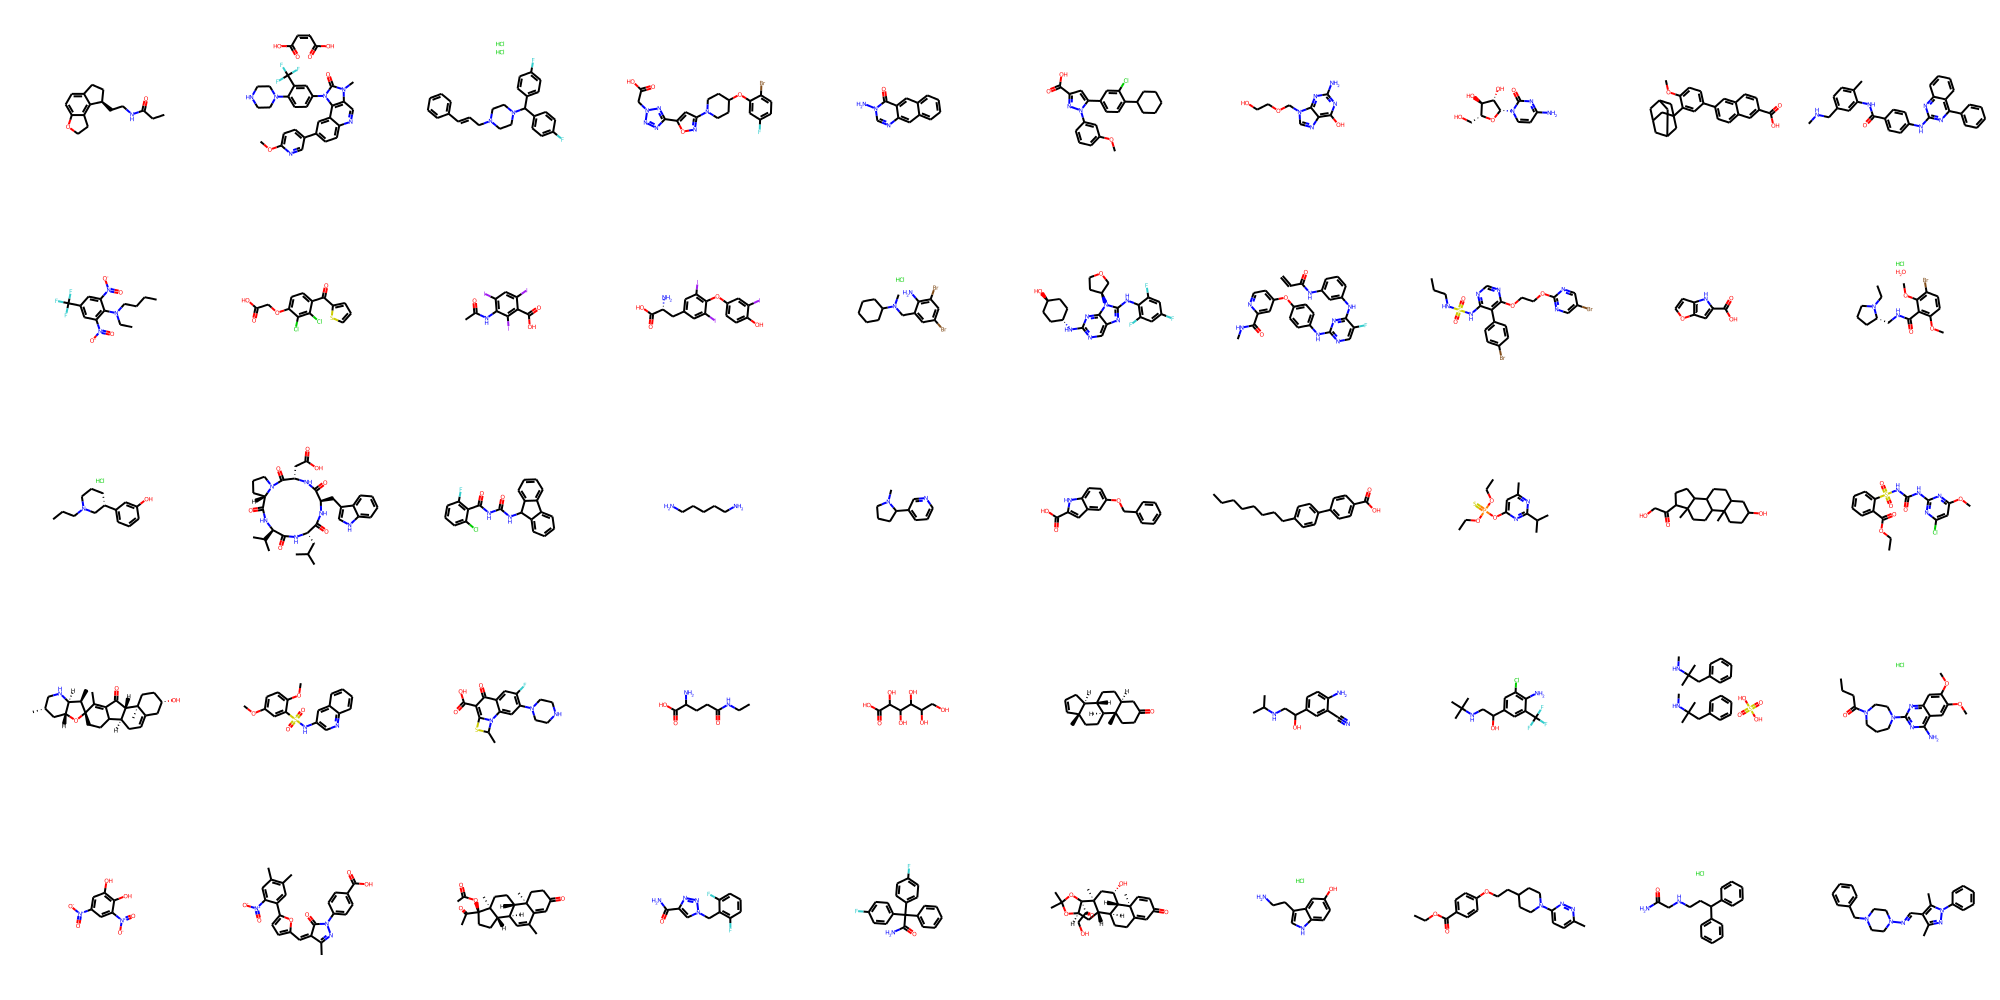

In [3957]:
smiles_list = [

'CCC(=O)NCC[C@@H]1CCc2ccc3c(c21)CCO3',
'COc1ccc(-c2ccc3ncc4c(c3c2)n(-c2ccc(N3CCNCC3)c(C(F)(F)F)c2)c(=O)n4C)cn1.O=C(O)/C=C\C(=O)O',
'Cl.Cl.Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1',
'O=C(O)Cn1nnc(-c2cc(N3CCC(Oc4cc(F)ccc4Br)CC3)no2)n1',
'Nn1cnc2cc3ccccc3cc2c1=O',
'COc1cccc(-n2nc(C(=O)O)cc2-c2ccc(C3CCCCC3)c(Cl)c2)c1',
'Nc1nc(O)c2ncn(COCCO)c2n1',
'Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@@H]2O)c(=O)n1',
'COc1ccc(-c2ccc3cc(C(=O)O)ccc3c2)cc1C12CC3CC(CC(C3)C1)C2',
'CNCc1ccc(C)c(NC(=O)c2ccc(Nc3nc(-c4ccccc4)c4ccccc4n3)cc2)c1',
'CCCCN(CC)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-]',
'O=C(O)COc1ccc(C(=O)c2cccs2)c(Cl)c1Cl',
'CC(=O)Nc1c(I)cc(I)c(C(=O)O)c1I',
'N[C@H](Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1)C(=O)O',
'CN(Cc1cc(Br)cc(Br)c1N)C1CCCCC1.Cl',
'O[C@H]1CC[C@H](Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C@H]4CCOC4)c3n2)CC1',
'C=CC(=O)Nc1cccc(Nc2nc(Nc3ccc(Oc4ccnc(C(=O)NC)c4)cc3)ncc2F)c1',
'CCCNS(=O)(=O)Nc1ncnc(OCCOc2ncc(Br)cn2)c1-c1ccc(Br)cc1',
'O=C(O)c1cc2occc2[nH]1',
'CCN1CCC[C@H]1CNC(=O)c1c(OC)ccc(Br)c1OC.Cl.O',
'CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl',
'CC(C)C[C@@H]1NC(=O)[C@@H](C(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(=O)O)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC1=O',
'O=C(NC(=O)c1c(F)cccc1Cl)NC1c2ccccc2-c2ccccc21',
'NCCCCCN',
'CN1CCCC1c1cccnc1',
'O=C(O)c1cc2cc(OCc3ccccc3)ccc2[nH]1',
'CCCCCCCCc1ccc(-c2ccc(C(=O)O)cc2)cc1',
'CCOP(=S)(OCC)Oc1cc(C)nc(C(C)C)n1',
'CC12CCC(O)CC1CCC1C2CCC2(C)C(C(=O)CO)CCC12',
'CCOC(=O)c1ccccc1S(=O)(=O)NC(=O)Nc1nc(Cl)cc(OC)n1',
'CC1=C2C(=O)[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)C2CC[C@]12O[C@@H]1C[C@H](C)CN[C@H]1[C@H]2C',
'COc1ccc(OC)c(S(=O)(=O)Nc2cnc3ccccc3c2)c1',
'CC1Sc2c(C(=O)O)c(=O)c3cc(F)c(N4CCNCC4)cc3n21',
'CCNC(=O)CCC(N)C(=O)O',
'O=C(O)C(O)C(O)C(O)C(O)CO',
'C[C@@]12C=CC[C@H]1[C@@H]1CC[C@H]3CC(=O)CC[C@]3(C)[C@H]1CC2',
'CC(C)NCC(O)c1ccc(N)c(C#N)c1',
'CC(C)(C)NCC(O)c1cc(Cl)c(N)c(C(F)(F)F)c1',
'CNC(C)(C)Cc1ccccc1.CNC(C)(C)Cc1ccccc1.O=S(=O)(O)O',
'CCCC(=O)N1CCCN(c2nc(N)c3cc(OC)c(OC)cc3n2)CC1.Cl',
'O=[N+]([O-])c1cc(O)c(O)c([N+](=O)[O-])c1',
'CC1=NN(c2ccc(C(=O)O)cc2)C(=O)C1=Cc1ccc(-c2cc(C)c(C)cc2[N+](=O)[O-])o1',
'CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C=C(C)C4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C',
'NC(=O)c1cn(Cc2c(F)cccc2F)nn1',
'NC(=O)C(c1ccccc1)(c1ccc(F)cc1)c1ccc(F)cc1',
'CC1(C)O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)C=C[C@]5(C)[C@H]4[C@@H](O)C[C@]3(C)[C@]2(C(=O)CO)O1',
'Cl.NCCc1c[nH]c2ccc(O)cc12',
'CCOC(=O)c1ccc(OCCC2CCN(c3ccc(C)nn3)CC2)cc1',
'Cl.NC(=O)CNCCC(c1ccccc1)c1ccccc1',
'Cc1nn(-c2ccccc2)c(C)c1/C=N/N1CCN(Cc2ccccc2)CC1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



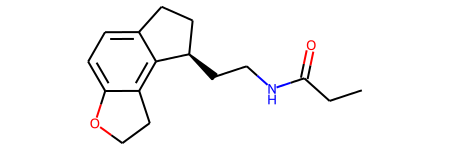

In [3958]:
M1 = mol_list [0]
M1

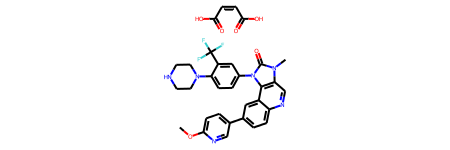

In [3959]:
M2 = mol_list [1]
M2

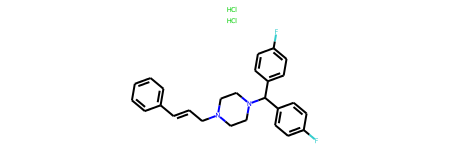

In [3960]:
M3 = mol_list [2]
M3

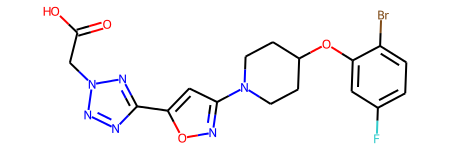

In [3961]:
M4 = mol_list [3]
M4

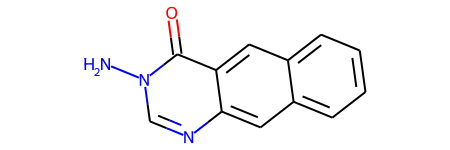

In [3962]:
M5 = mol_list [4]
M5

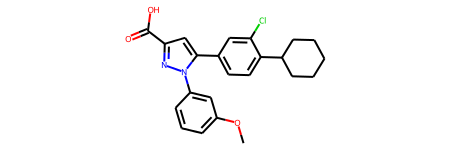

In [3963]:
M6 = mol_list [5]
M6

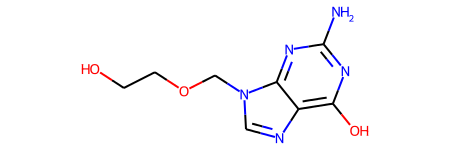

In [3964]:
M7 = mol_list [6]
M7

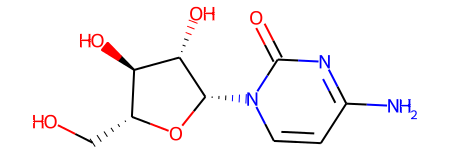

In [3965]:
M8 = mol_list [7]
M8

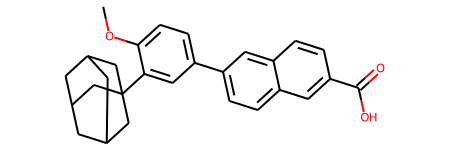

In [3966]:
M9 = mol_list [8]
M9

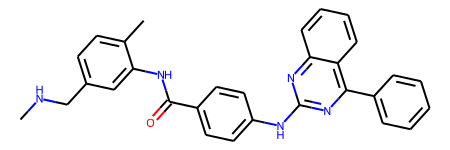

In [3967]:
M10 = mol_list [9]
M10

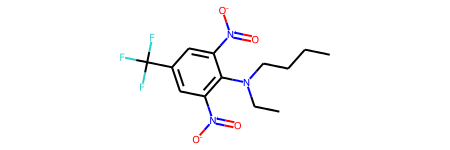

In [3968]:
M11 = mol_list [10]
M11

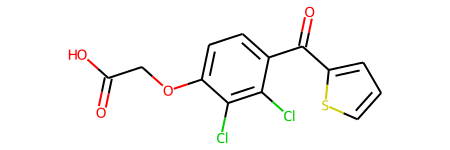

In [3969]:
M12 = mol_list [11]
M12

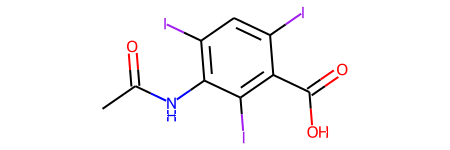

In [3970]:
M13 = mol_list [12]
M13

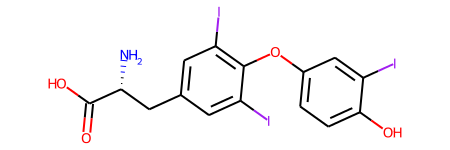

In [3971]:
M14 = mol_list [13]
M14

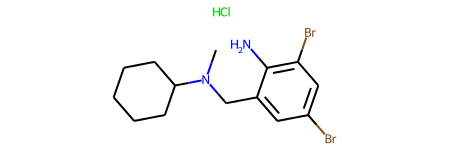

In [3972]:
M15 = mol_list [14]
M15

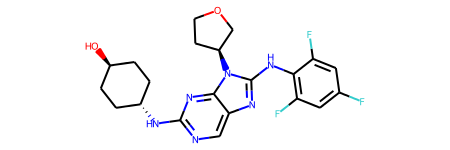

In [3973]:
M16 = mol_list [15]
M16

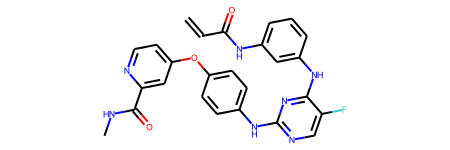

In [3974]:
M17 = mol_list [16]
M17

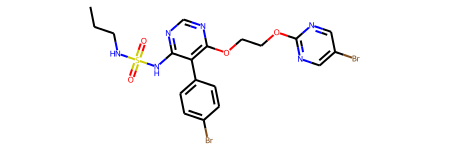

In [3975]:
M18 = mol_list [17]
M18

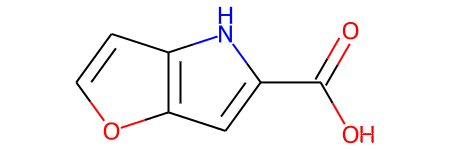

In [3976]:
M19 = mol_list [18]
M19

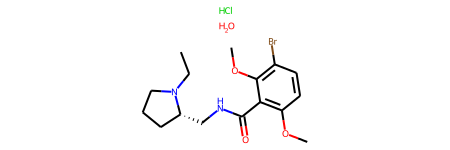

In [3977]:
M20 = mol_list [19]
M20

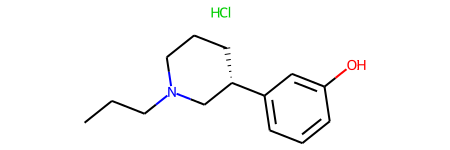

In [3978]:
M21 = mol_list [20]
M21

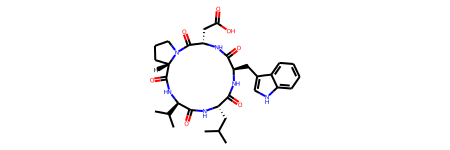

In [3979]:
M22 = mol_list [21]
M22

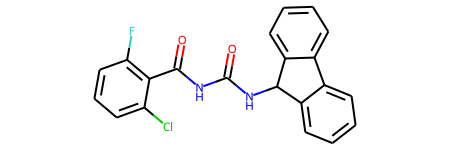

In [3980]:
M23 = mol_list [22]
M23

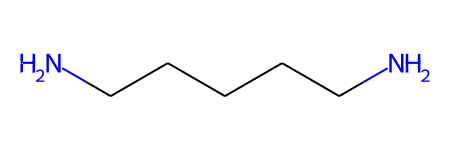

In [3981]:
M24 = mol_list [23]
M24

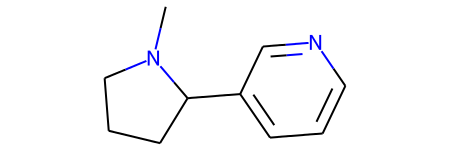

In [3982]:
M25 = mol_list [24]
M25

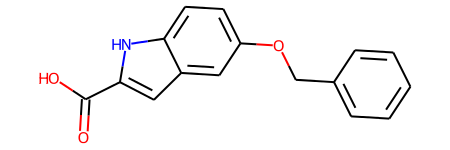

In [3983]:
M26 = mol_list [25]
M26

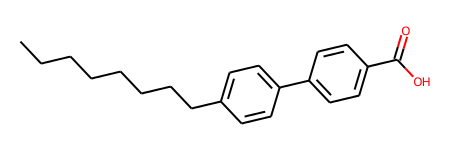

In [3984]:
M27 = mol_list [26]
M27

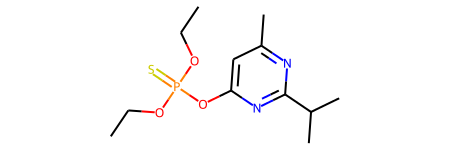

In [3985]:
M28 = mol_list [27]
M28

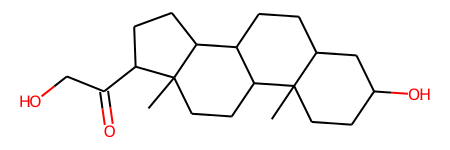

In [3986]:
M29 = mol_list [28]
M29

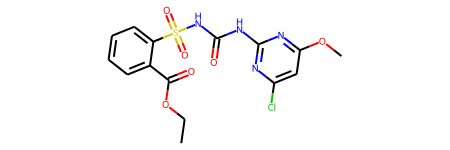

In [3987]:
M30 = mol_list [29]
M30

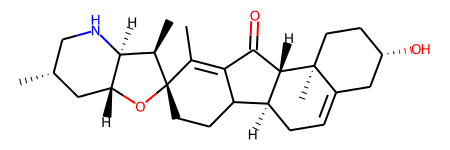

In [3988]:
M31 = mol_list [30]
M31

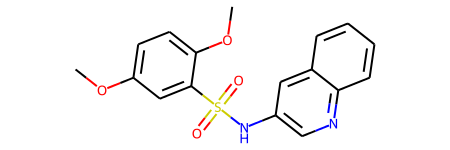

In [3989]:
M32 = mol_list [31]
M32

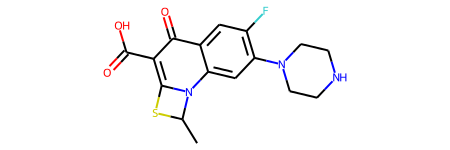

In [3990]:
M33 = mol_list [32]
M33

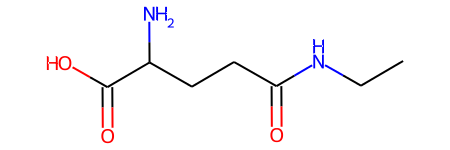

In [3991]:
M34 = mol_list [33]
M34

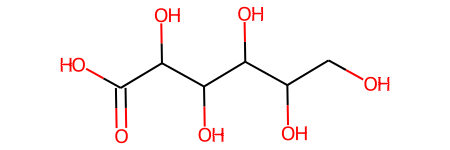

In [3992]:
M35 = mol_list [34]
M35

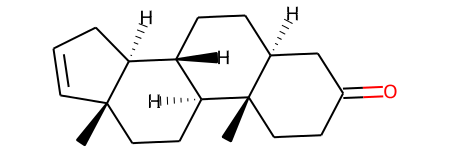

In [3993]:
M36 = mol_list [35]
M36

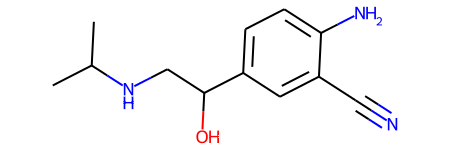

In [3994]:
M37= mol_list [36]
M37

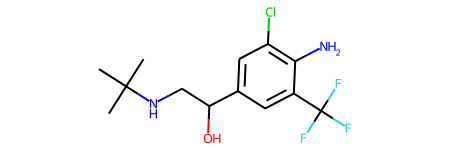

In [3995]:
M38= mol_list [37]
M38

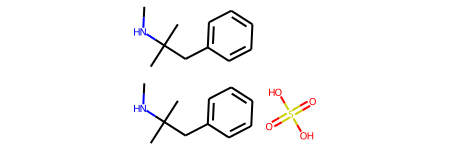

In [3996]:
M39= mol_list [38]
M39

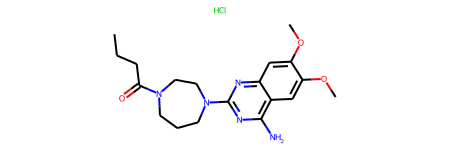

In [3997]:
M40= mol_list [39]
M40

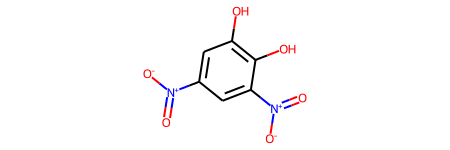

In [3998]:
M41= mol_list [40]
M41

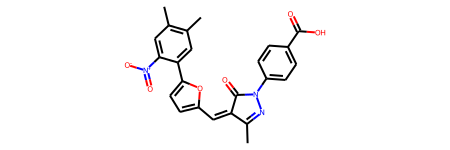

In [3999]:
M42= mol_list [41]
M42

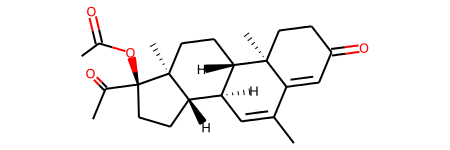

In [4000]:
M43= mol_list [42]
M43

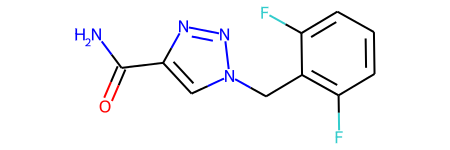

In [4001]:
M44= mol_list [43]
M44

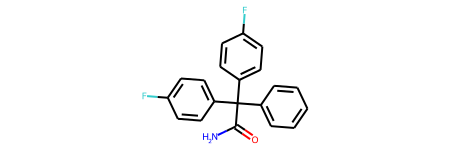

In [4002]:
M45= mol_list [44]
M45

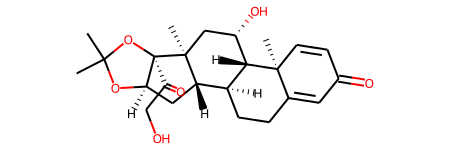

In [4003]:
M46= mol_list [45]
M46

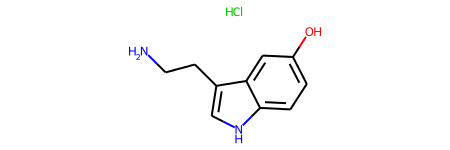

In [4004]:
M47= mol_list [46]
M47

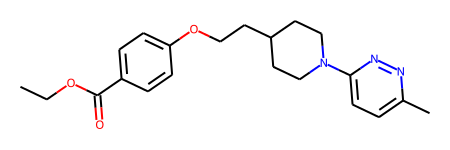

In [4005]:
M48= mol_list [47]
M48

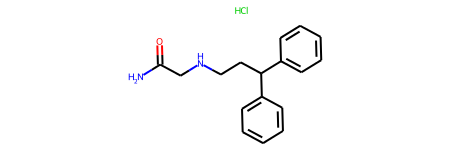

In [4006]:
M49= mol_list [48]
M49

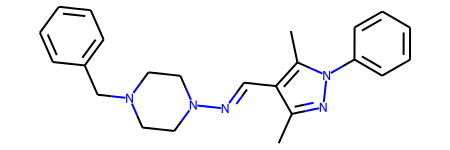

In [4007]:
M50= mol_list [49]
M50

In [4008]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[11,
 33,
 41,
 80,
 97,
 117,
 128,
 197,
 212,
 294,
 301,
 320,
 356,
 361,
 371,
 441,
 505,
 587,
 597,
 602,
 624,
 650,
 656,
 667,
 680,
 713,
 714,
 726,
 798,
 802,
 807,
 821,
 832,
 849,
 881,
 893,
 898,
 911,
 917,
 926,
 950,
 956,
 1012,
 1019]

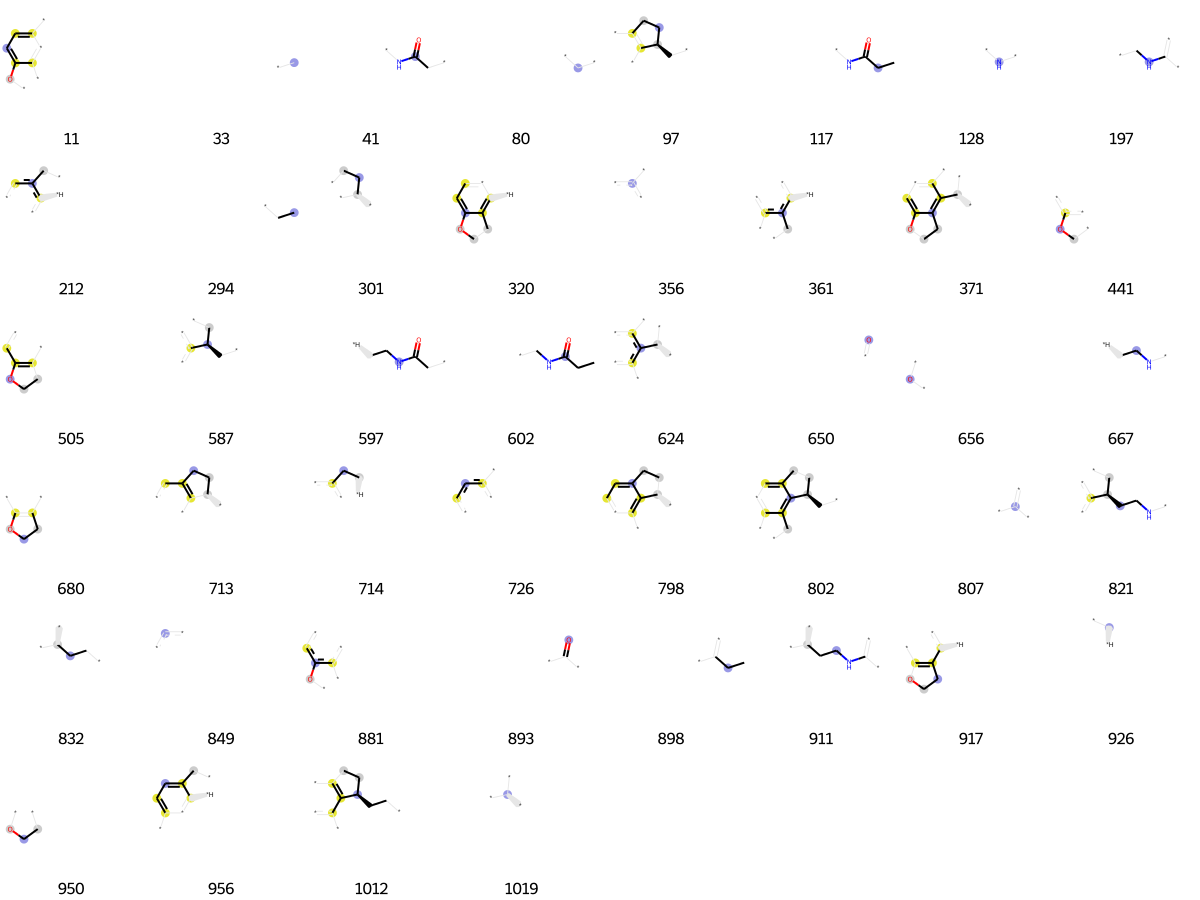

In [4009]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [4010]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[11,
 31,
 33,
 36,
 45,
 73,
 90,
 114,
 121,
 136,
 150,
 168,
 231,
 233,
 262,
 271,
 284,
 285,
 305,
 311,
 314,
 333,
 356,
 373,
 378,
 389,
 407,
 416,
 419,
 421,
 428,
 429,
 439,
 456,
 463,
 492,
 494,
 508,
 511,
 512,
 546,
 564,
 592,
 629,
 641,
 650,
 670,
 694,
 695,
 714,
 726,
 771,
 785,
 801,
 804,
 807,
 809,
 831,
 841,
 849,
 875,
 891,
 893,
 896,
 904,
 926,
 935,
 953,
 961,
 969,
 976,
 983,
 996,
 997]

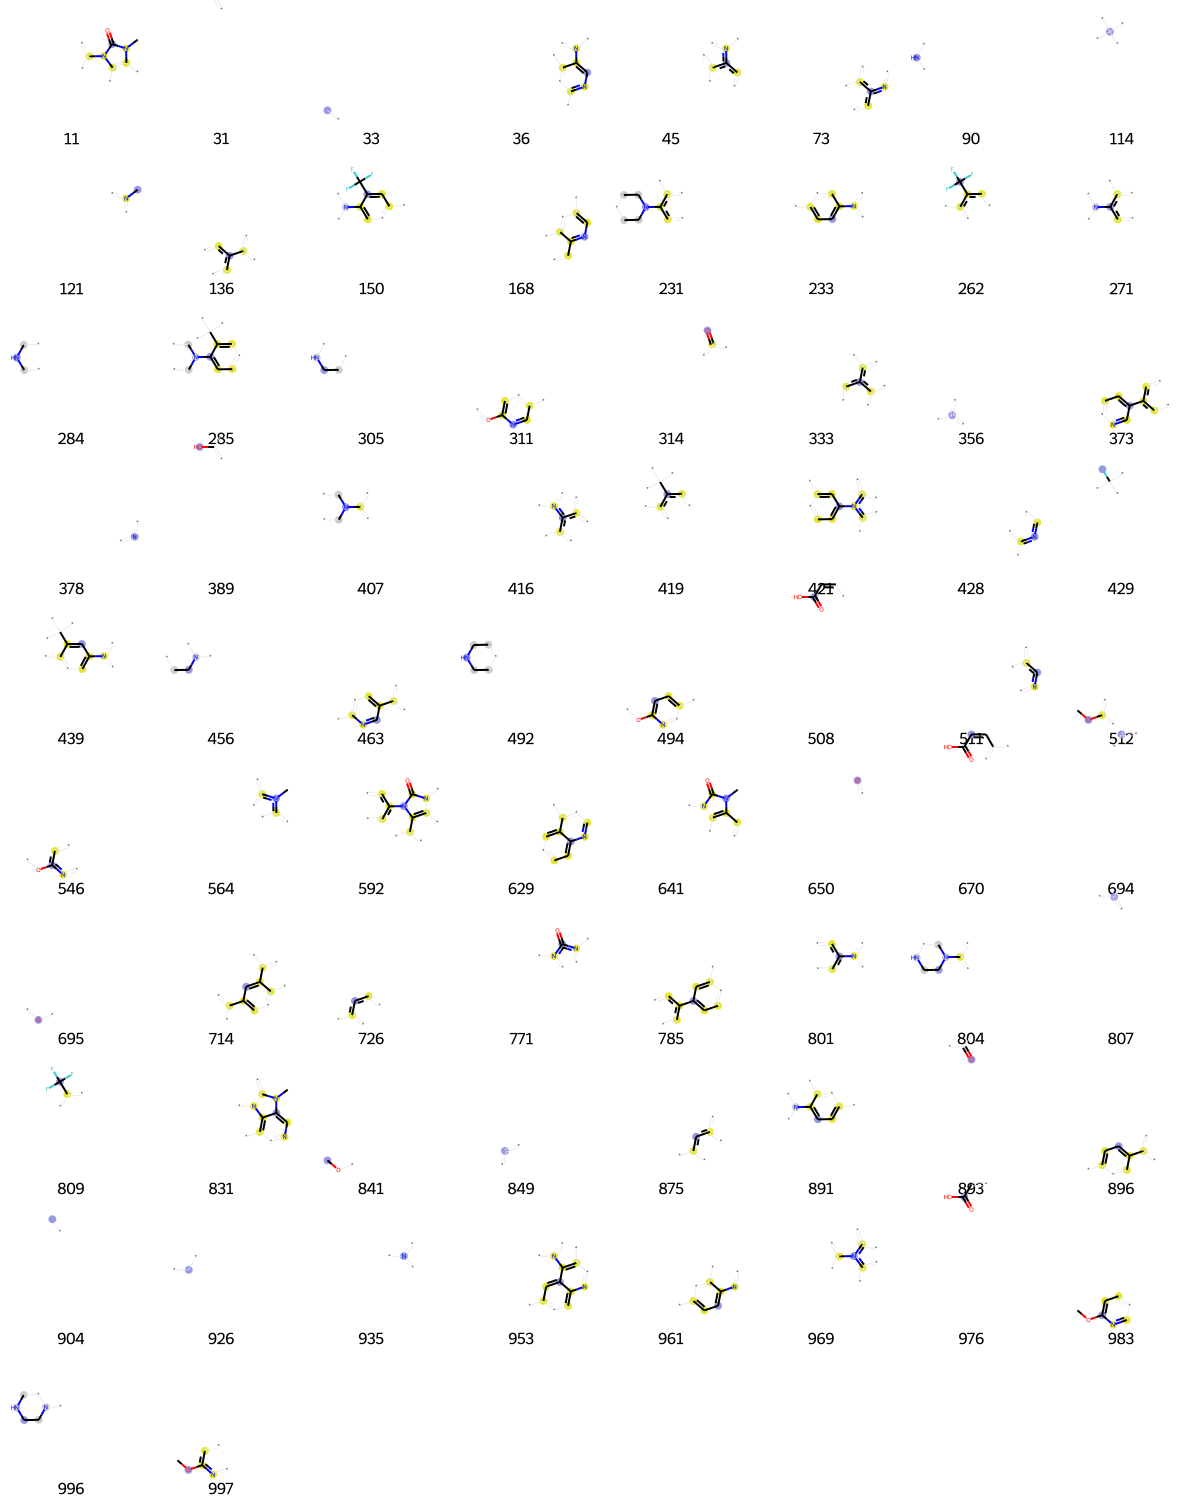

In [4011]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [4012]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 15,
 64,
 65,
 74,
 80,
 90,
 175,
 241,
 297,
 329,
 332,
 340,
 341,
 356,
 386,
 389,
 406,
 456,
 461,
 479,
 514,
 603,
 646,
 694,
 699,
 726,
 767,
 829,
 835,
 849,
 876,
 878,
 904,
 926,
 935,
 1000,
 1009]

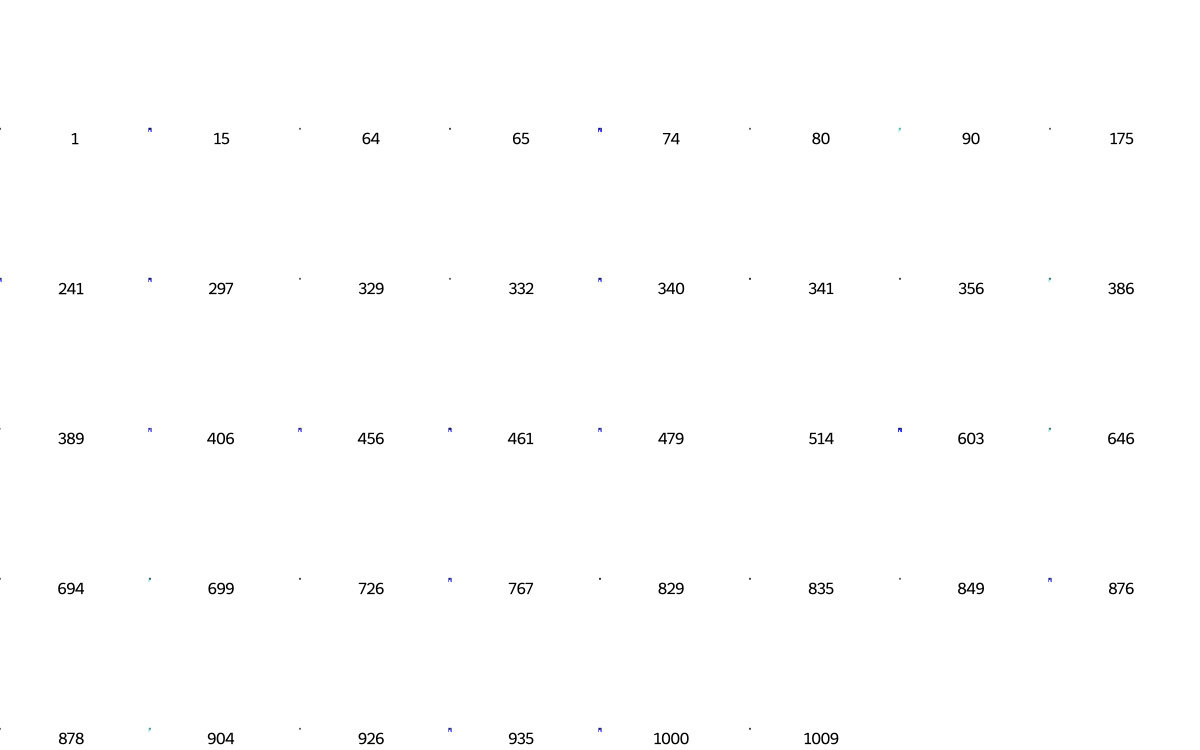

In [4013]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [4014]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[26,
 39,
 80,
 97,
 119,
 121,
 124,
 136,
 140,
 151,
 201,
 206,
 215,
 248,
 288,
 301,
 307,
 335,
 356,
 361,
 374,
 378,
 386,
 389,
 407,
 456,
 463,
 518,
 522,
 524,
 527,
 607,
 646,
 650,
 656,
 675,
 695,
 699,
 707,
 713,
 726,
 728,
 759,
 807,
 833,
 841,
 849,
 857,
 866,
 872,
 875,
 893,
 904,
 926,
 932,
 935,
 946,
 959,
 970,
 1019]

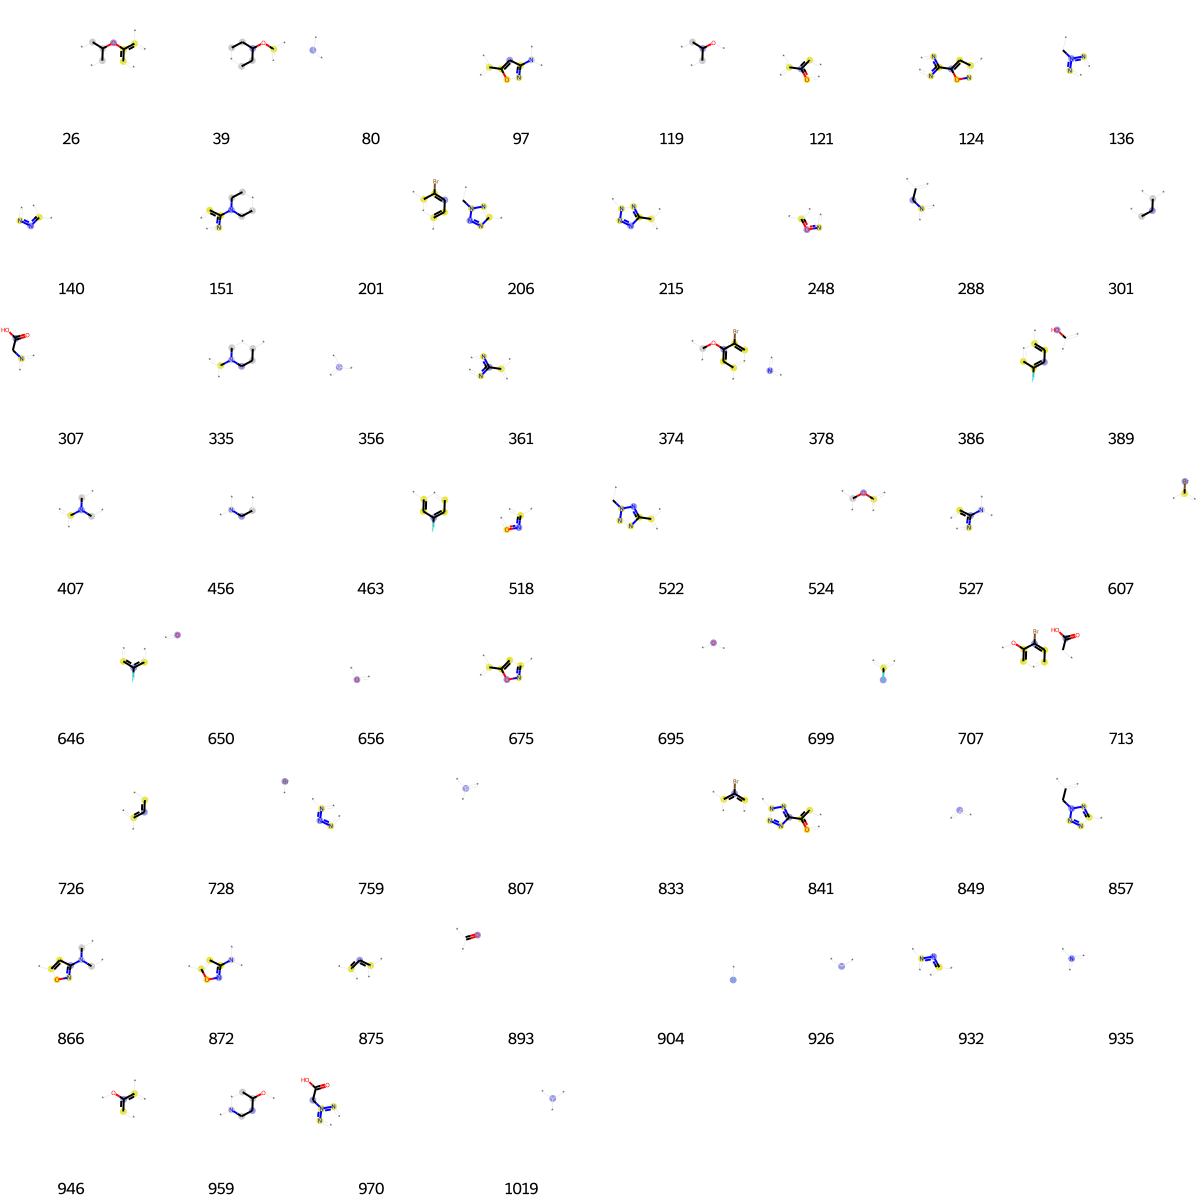

In [4015]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [4016]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[12,
 63,
 64,
 73,
 126,
 146,
 147,
 175,
 226,
 314,
 322,
 333,
 356,
 378,
 428,
 492,
 504,
 557,
 650,
 673,
 726,
 831,
 849,
 875,
 890,
 932,
 935,
 1000,
 1015]

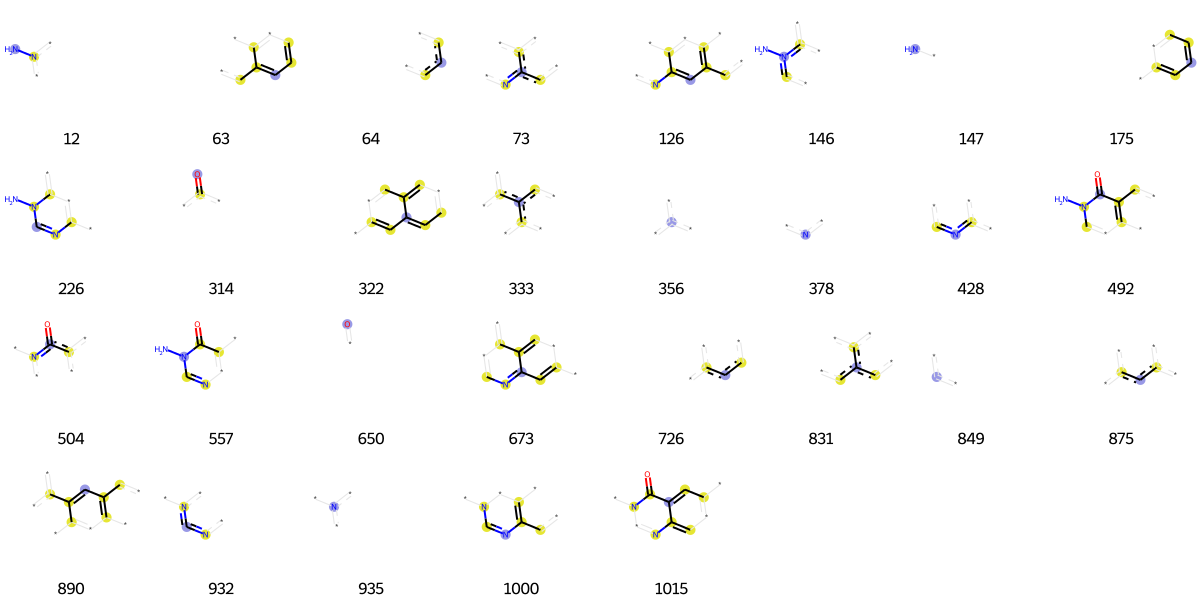

In [4017]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [4018]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[2,
 3,
 4,
 15,
 25,
 33,
 64,
 105,
 135,
 136,
 178,
 207,
 277,
 297,
 301,
 304,
 305,
 322,
 356,
 366,
 375,
 378,
 389,
 456,
 459,
 512,
 561,
 562,
 650,
 659,
 668,
 695,
 726,
 781,
 801,
 807,
 828,
 829,
 841,
 849,
 855,
 875,
 890,
 893,
 896,
 919,
 926,
 932,
 935,
 948,
 975,
 976,
 1019]

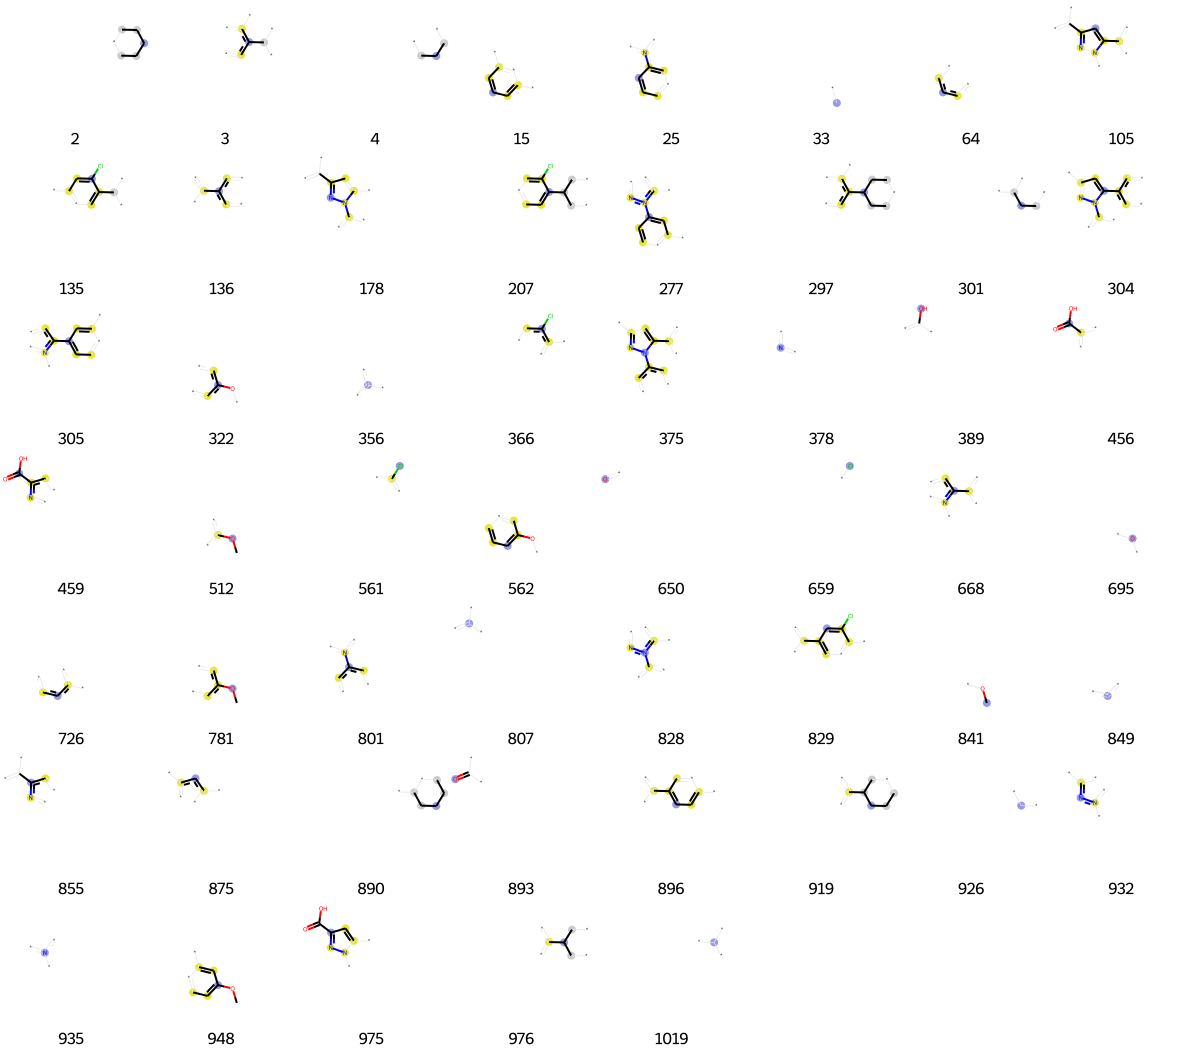

In [4019]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [4020]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[13,
 45,
 71,
 80,
 106,
 147,
 150,
 216,
 222,
 289,
 345,
 351,
 356,
 378,
 409,
 428,
 431,
 433,
 473,
 578,
 672,
 695,
 696,
 700,
 701,
 807,
 816,
 831,
 849,
 852,
 867,
 896,
 932,
 935,
 968,
 1000]

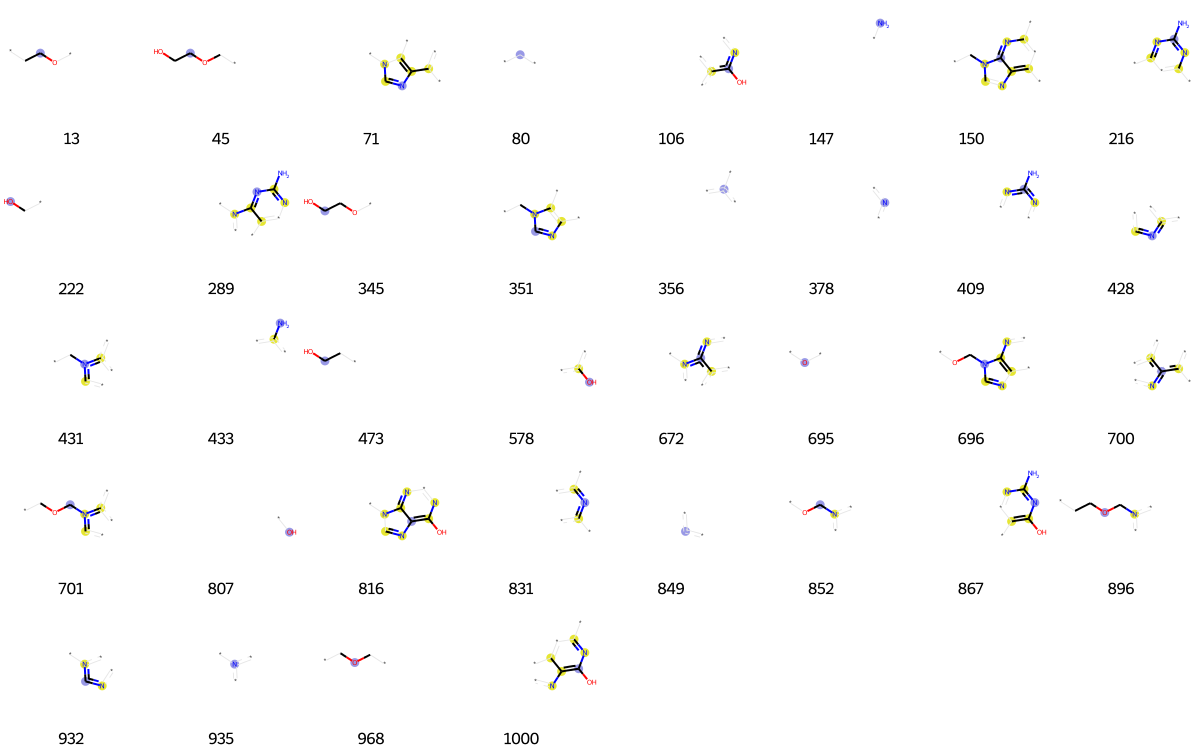

In [4021]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [4022]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[62,
 75,
 77,
 80,
 119,
 147,
 152,
 210,
 222,
 233,
 314,
 356,
 378,
 424,
 433,
 454,
 463,
 485,
 492,
 498,
 577,
 606,
 610,
 650,
 656,
 726,
 740,
 807,
 820,
 831,
 849,
 863,
 897,
 935,
 1018,
 1019]

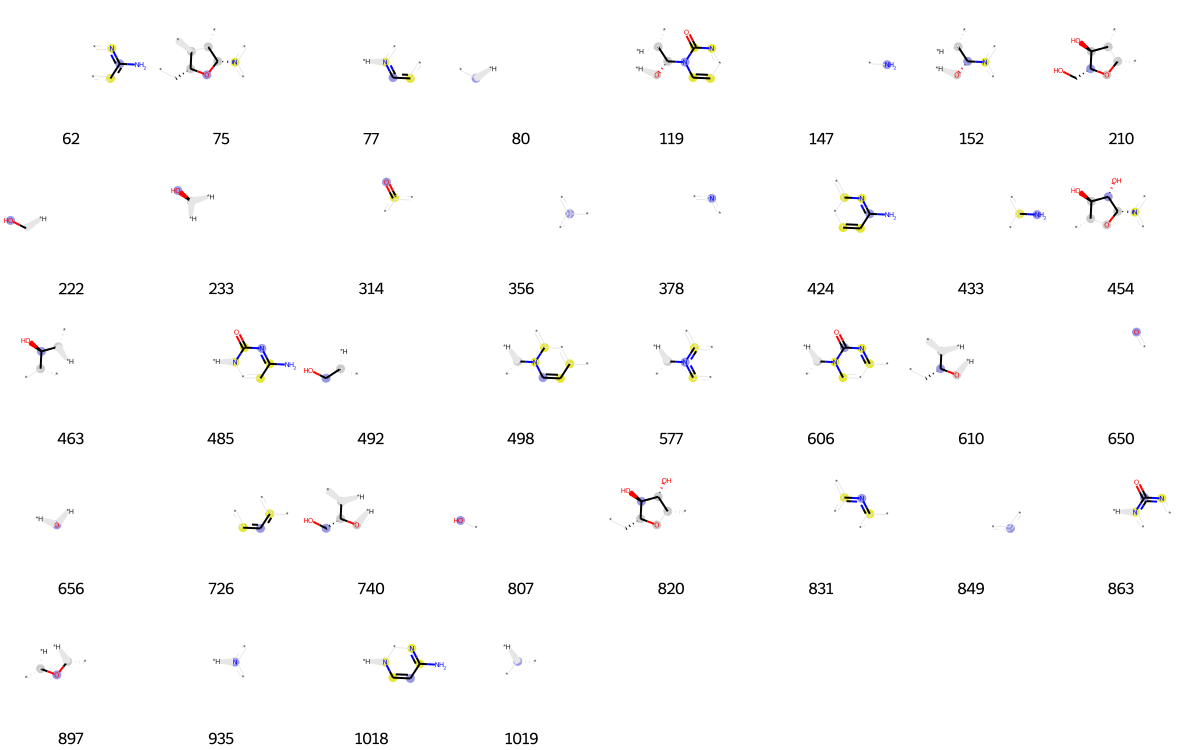

In [4023]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [4024]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 36,
 94,
 114,
 135,
 136,
 203,
 204,
 225,
 249,
 250,
 258,
 268,
 288,
 322,
 356,
 361,
 389,
 422,
 456,
 512,
 578,
 650,
 673,
 675,
 679,
 695,
 726,
 785,
 807,
 831,
 841,
 849,
 875,
 893,
 896,
 926,
 946,
 952,
 956,
 980,
 1019]

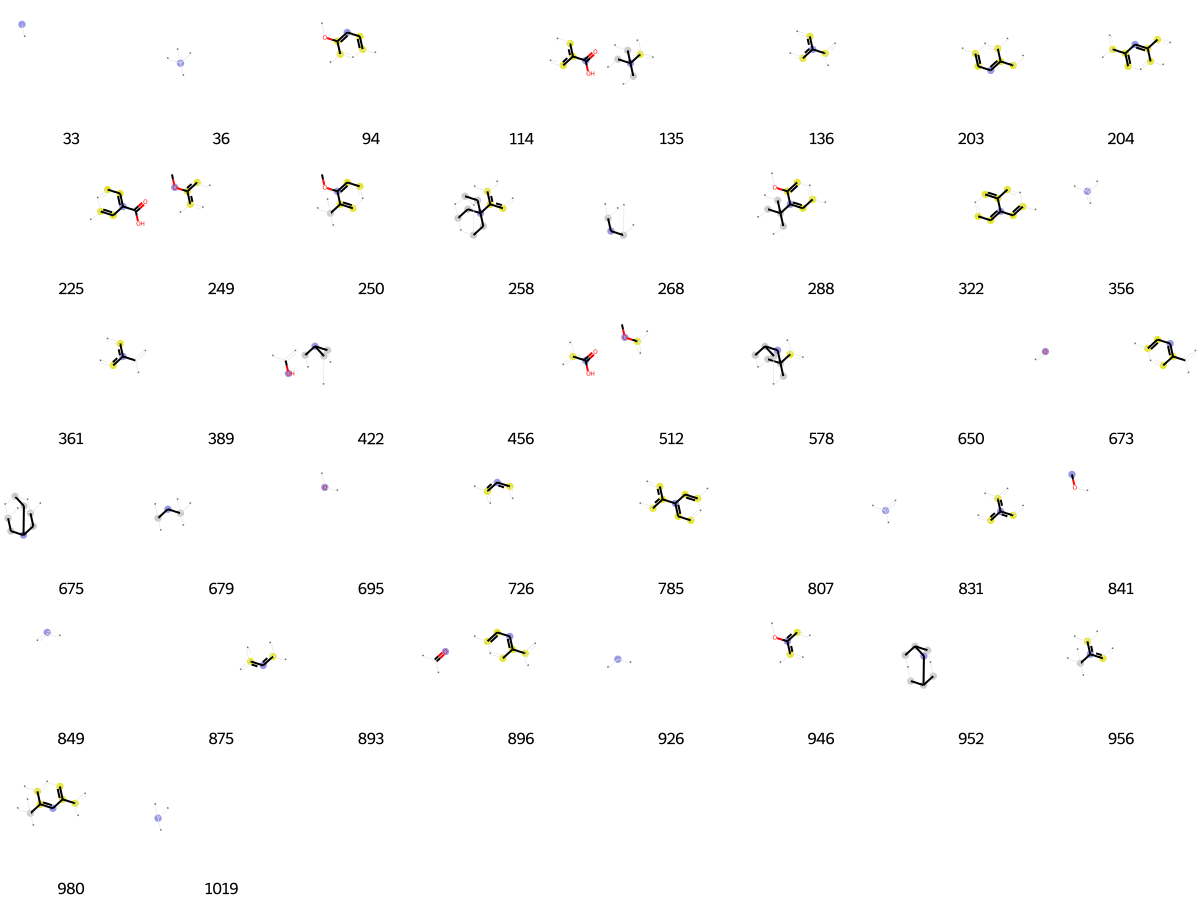

In [4025]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [4026]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[33,
 64,
 73,
 80,
 128,
 136,
 173,
 175,
 191,
 200,
 255,
 289,
 297,
 310,
 323,
 333,
 356,
 361,
 367,
 378,
 389,
 403,
 406,
 471,
 486,
 491,
 500,
 549,
 558,
 562,
 591,
 609,
 641,
 650,
 658,
 667,
 673,
 698,
 715,
 726,
 730,
 736,
 755,
 771,
 790,
 792,
 807,
 828,
 831,
 843,
 849,
 875,
 886,
 893,
 947,
 971]

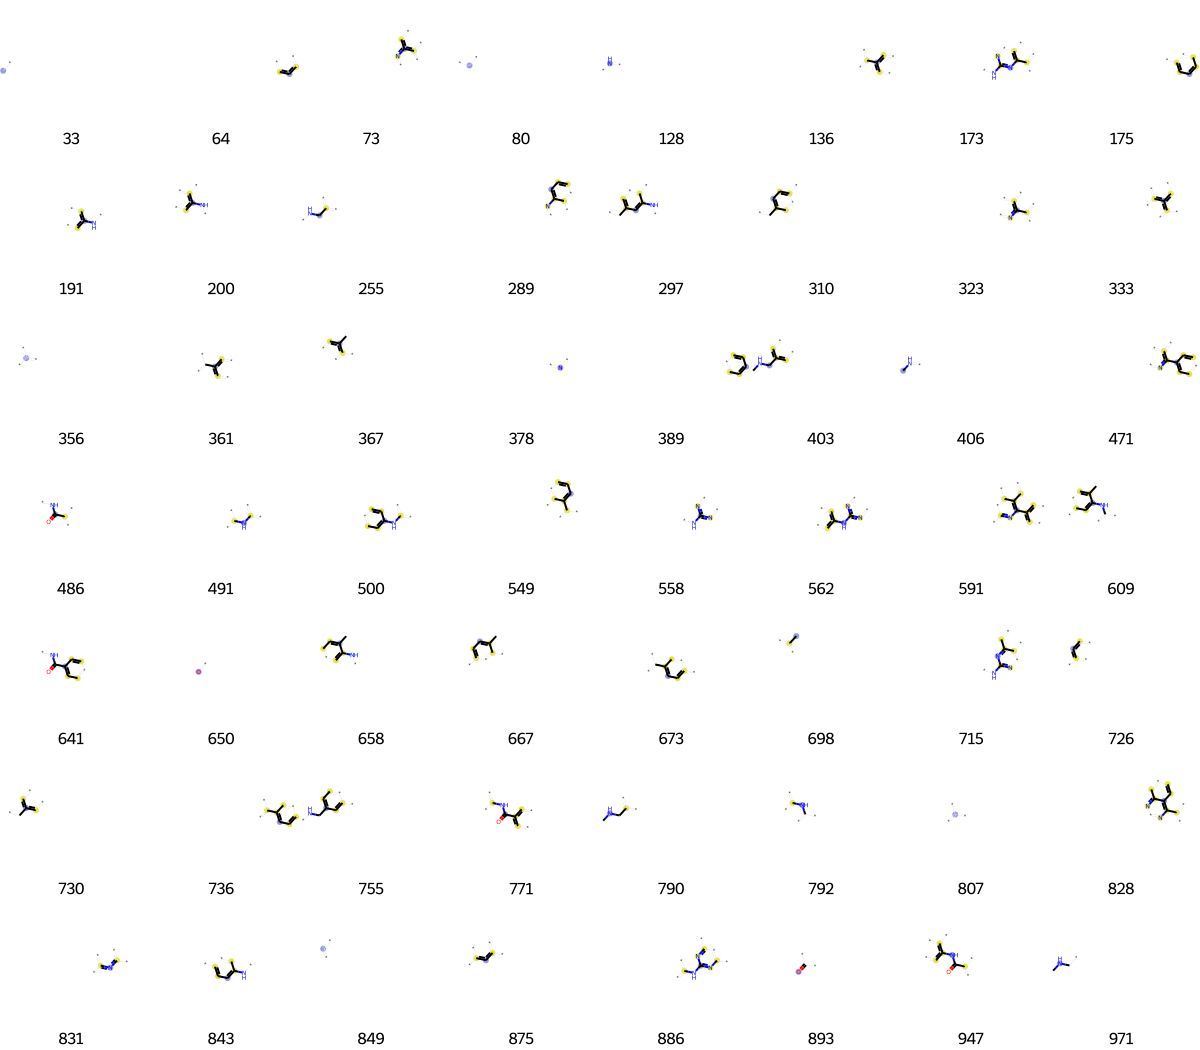

In [4027]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [4028]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[33,
 80,
 114,
 134,
 171,
 180,
 236,
 279,
 294,
 331,
 348,
 350,
 354,
 356,
 393,
 407,
 429,
 591,
 650,
 663,
 715,
 716,
 753,
 794,
 809,
 838,
 849,
 875,
 881,
 887,
 904,
 906,
 927,
 932,
 939,
 953]

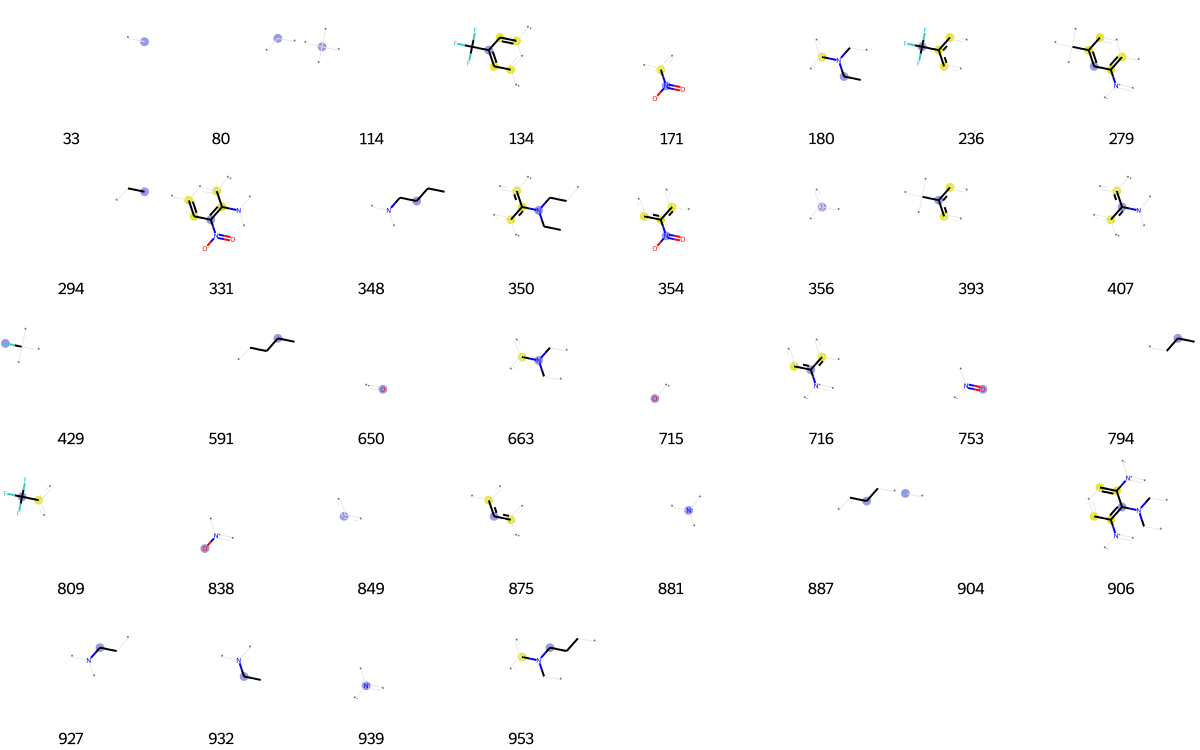

In [4029]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [4030]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[9,
 14,
 64,
 67,
 79,
 80,
 94,
 97,
 163,
 188,
 241,
 356,
 383,
 389,
 416,
 419,
 428,
 444,
 543,
 558,
 561,
 600,
 650,
 659,
 675,
 684,
 695,
 713,
 726,
 807,
 849,
 893,
 915,
 946,
 967,
 980,
 991,
 1011]

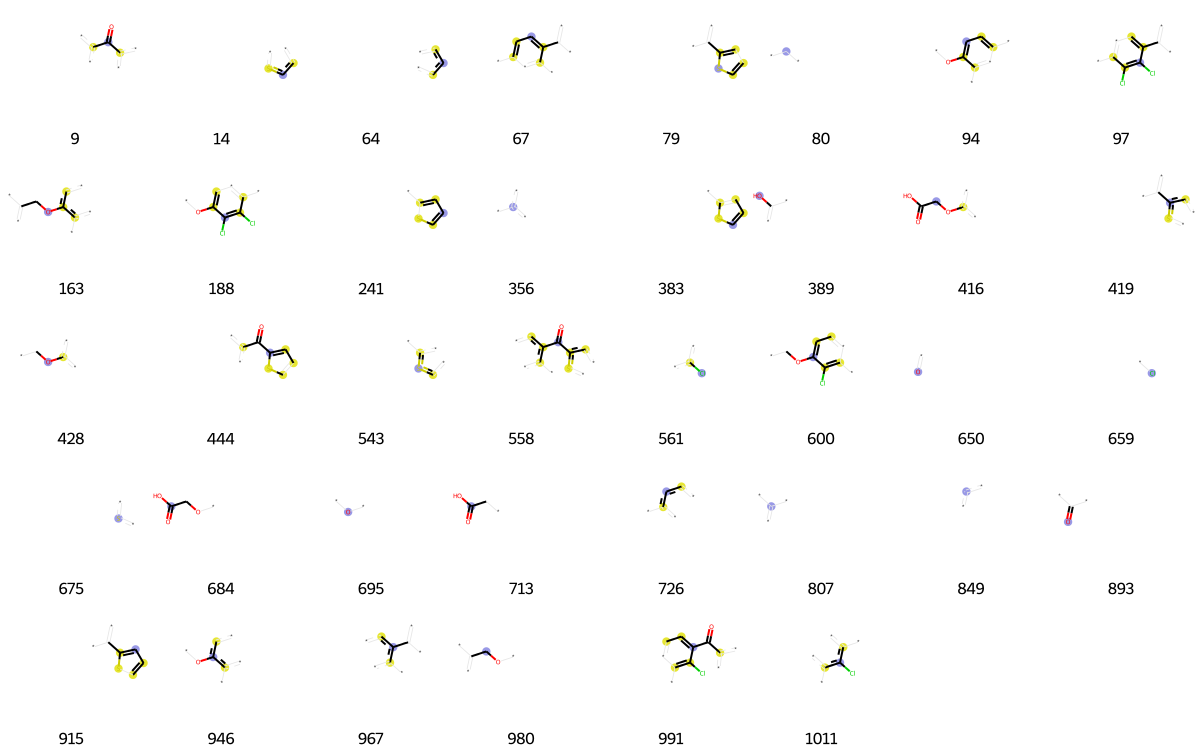

In [4031]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [4032]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[33,
 128,
 176,
 180,
 208,
 245,
 316,
 356,
 361,
 381,
 389,
 456,
 509,
 582,
 586,
 650,
 661,
 728,
 792,
 807,
 849,
 875,
 893,
 947,
 955,
 981,
 1017]

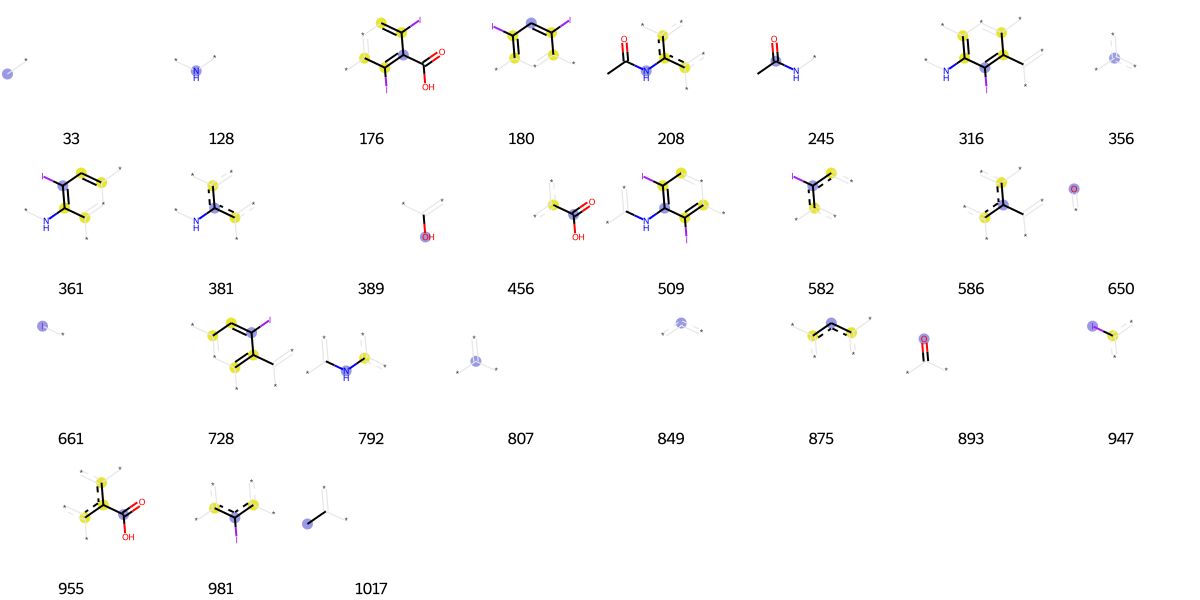

In [4033]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [4034]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[0,
 1,
 79,
 80,
 147,
 197,
 290,
 322,
 333,
 346,
 356,
 384,
 387,
 389,
 403,
 451,
 473,
 578,
 582,
 583,
 593,
 650,
 661,
 695,
 718,
 726,
 730,
 731,
 739,
 786,
 807,
 820,
 825,
 849,
 875,
 893,
 936,
 947,
 1017]

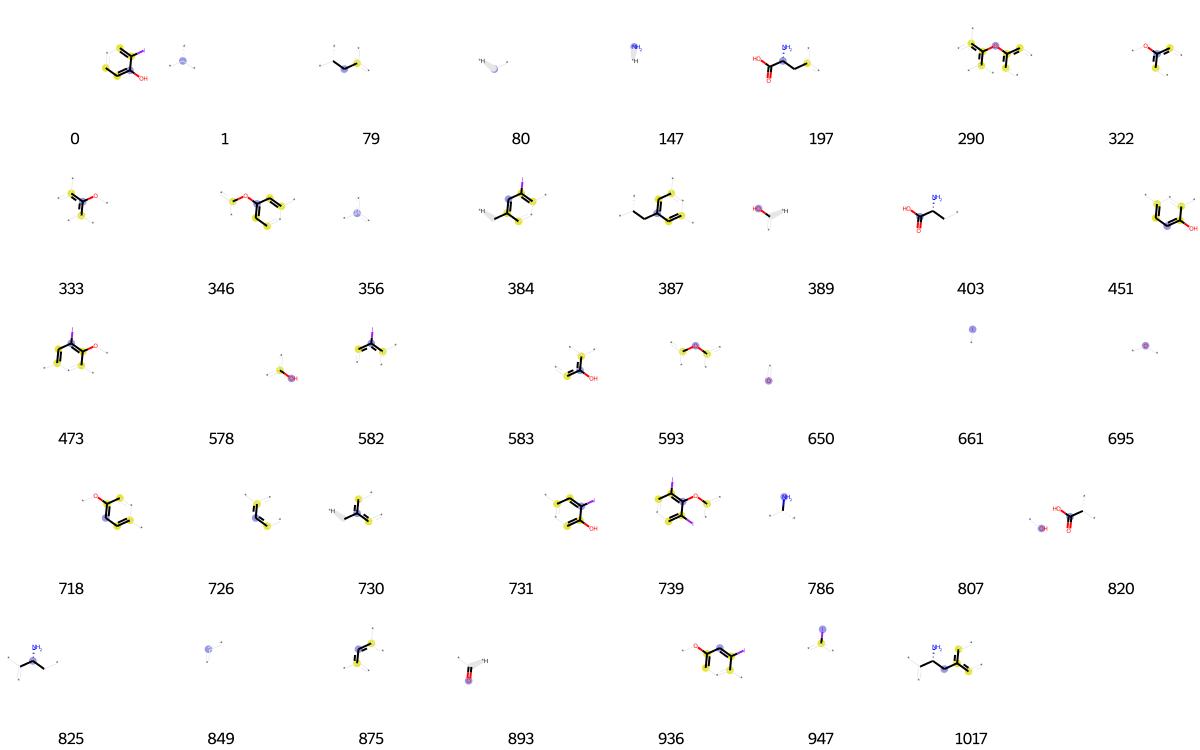

In [4035]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [4036]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[2,
 4,
 33,
 39,
 63,
 80,
 139,
 147,
 169,
 254,
 275,
 283,
 301,
 325,
 356,
 433,
 507,
 514,
 607,
 664,
 726,
 727,
 728,
 762,
 809,
 833,
 849,
 875,
 881,
 890,
 895,
 908,
 909,
 926,
 1019]

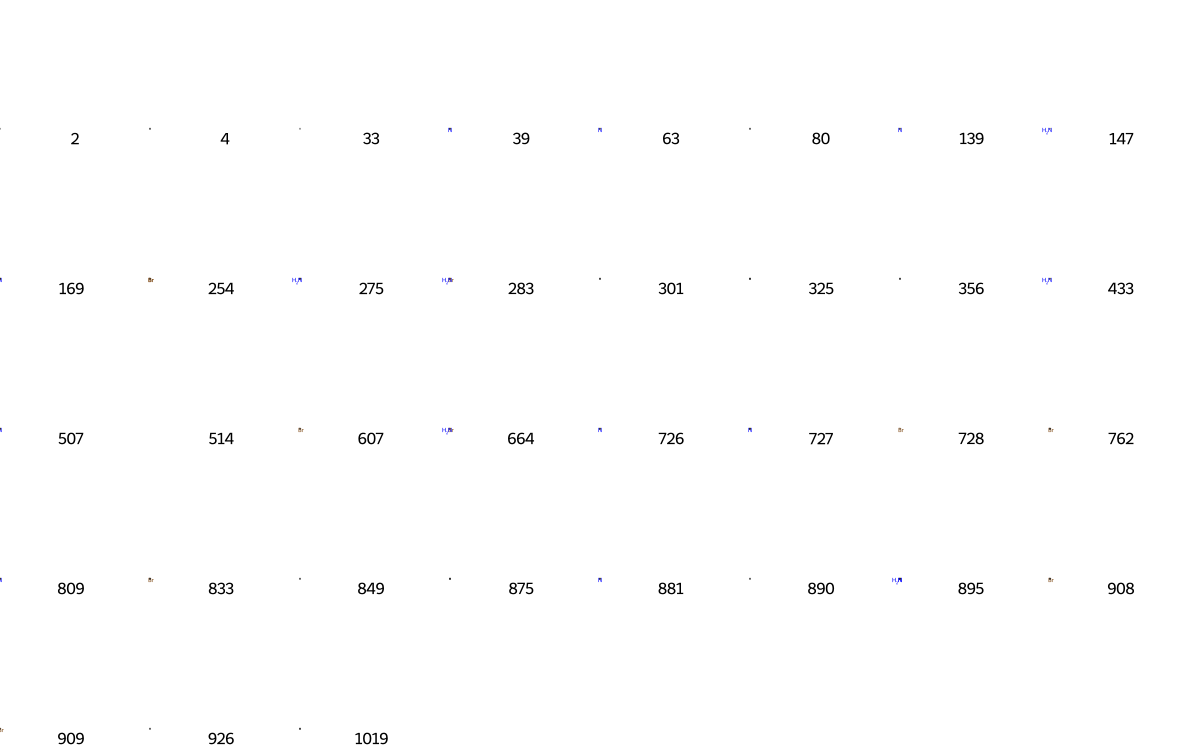

In [4037]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [4038]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[8,
 9,
 73,
 78,
 119,
 128,
 157,
 163,
 182,
 233,
 237,
 241,
 244,
 301,
 356,
 378,
 381,
 422,
 428,
 484,
 491,
 511,
 523,
 544,
 558,
 565,
 587,
 590,
 610,
 646,
 656,
 672,
 699,
 716,
 735,
 738,
 754,
 767,
 802,
 806,
 807,
 816,
 831,
 849,
 875,
 886,
 899,
 904,
 910,
 926,
 933,
 935,
 940,
 950,
 1019]

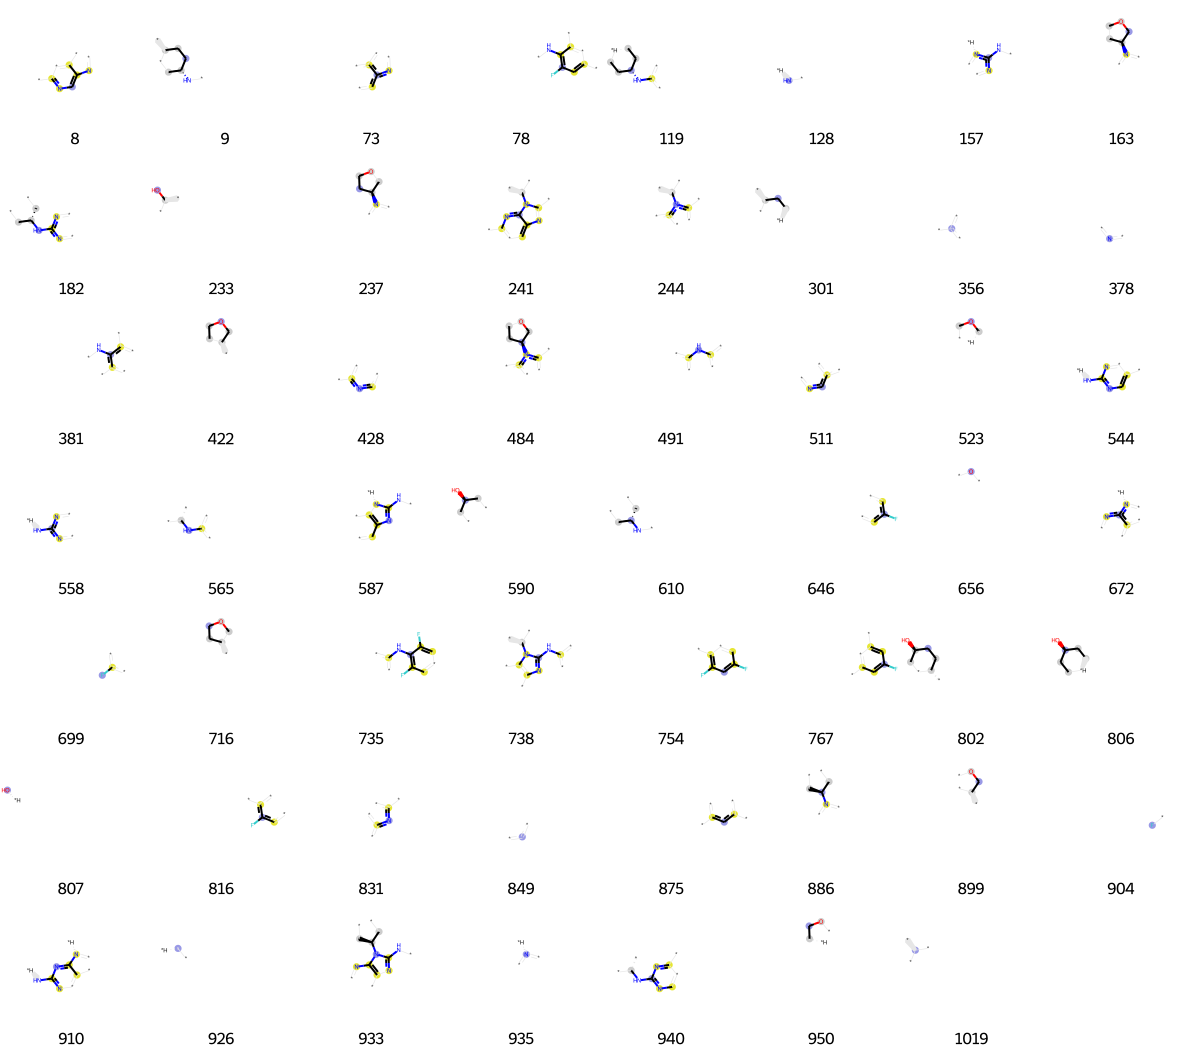

In [4039]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [4040]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[15,
 33,
 64,
 128,
 153,
 155,
 157,
 161,
 184,
 191,
 193,
 228,
 322,
 329,
 342,
 345,
 346,
 356,
 378,
 406,
 420,
 428,
 445,
 458,
 486,
 491,
 500,
 511,
 544,
 552,
 558,
 562,
 579,
 593,
 608,
 619,
 621,
 650,
 682,
 694,
 695,
 699,
 703,
 708,
 718,
 726,
 787,
 791,
 792,
 807,
 816,
 831,
 842,
 843,
 849,
 855,
 858,
 875,
 888,
 893,
 904,
 930,
 959]

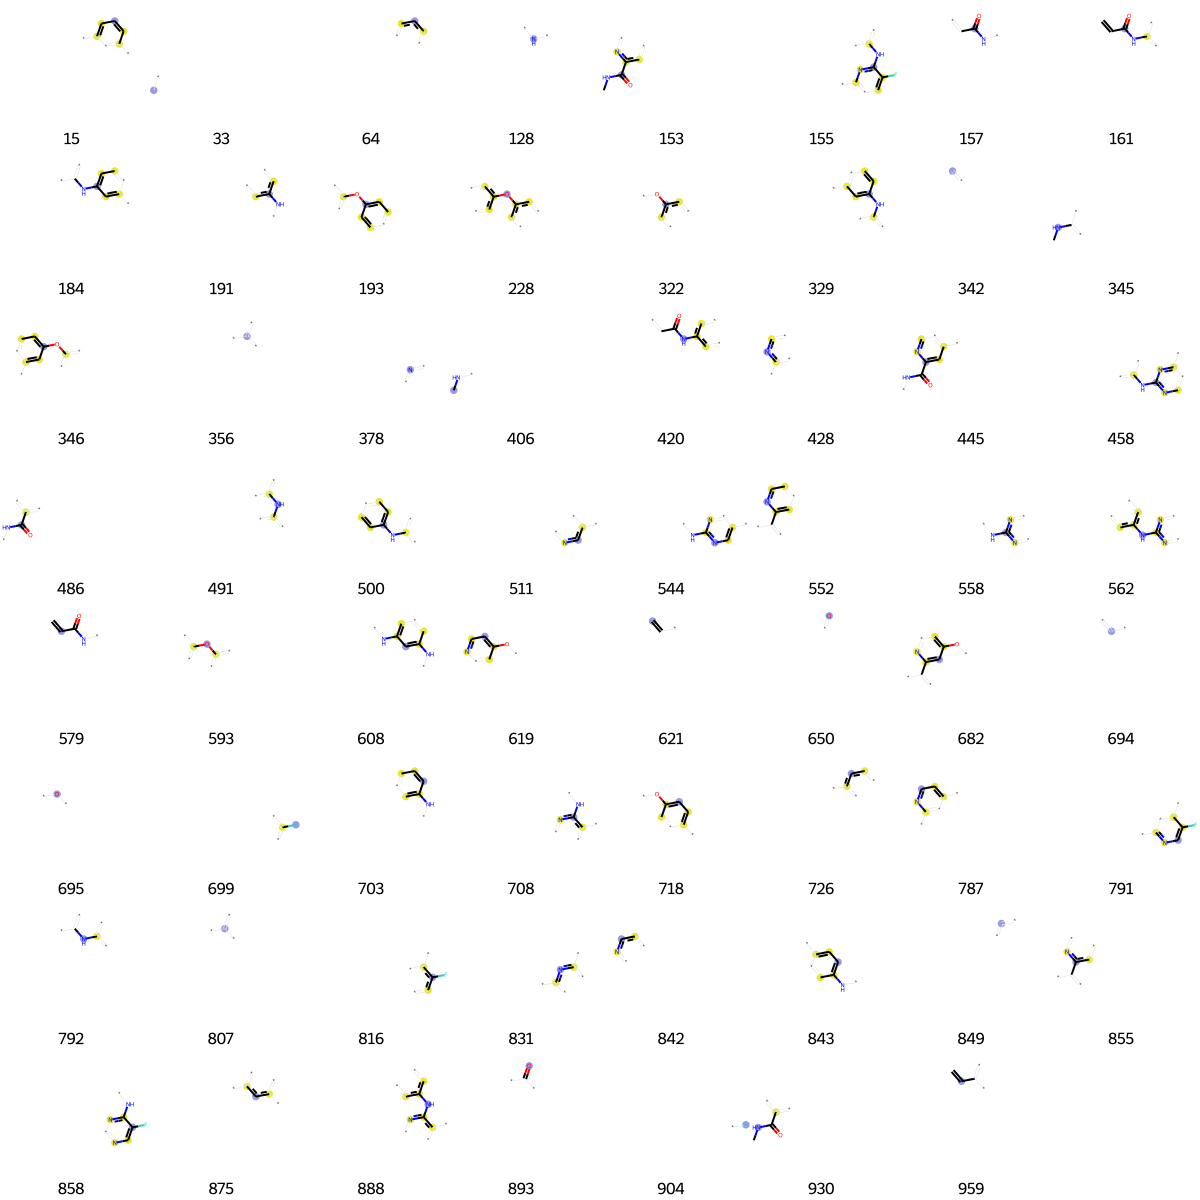

In [4041]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [4042]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[13,
 30,
 33,
 77,
 80,
 128,
 133,
 136,
 143,
 196,
 204,
 246,
 294,
 299,
 343,
 350,
 356,
 371,
 378,
 379,
 391,
 401,
 423,
 428,
 452,
 458,
 489,
 511,
 569,
 602,
 607,
 624,
 625,
 650,
 667,
 676,
 695,
 708,
 712,
 723,
 726,
 728,
 743,
 786,
 794,
 814,
 849,
 896,
 898,
 909,
 944]

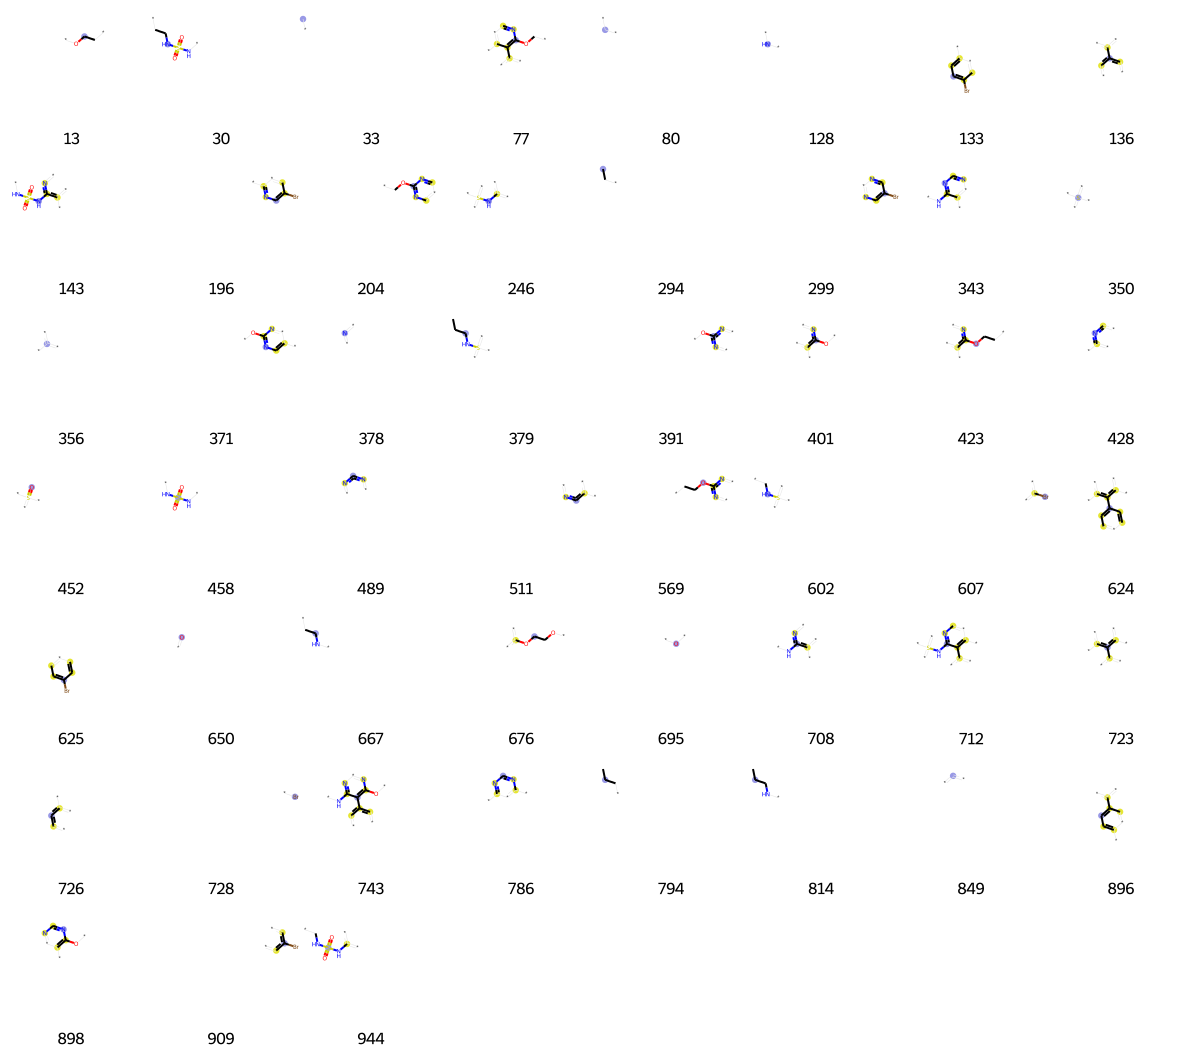

In [4043]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [4044]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[68,
 90,
 119,
 143,
 166,
 209,
 356,
 389,
 440,
 456,
 600,
 607,
 637,
 650,
 656,
 721,
 726,
 784,
 787,
 800,
 807,
 849,
 875,
 893,
 918,
 985]

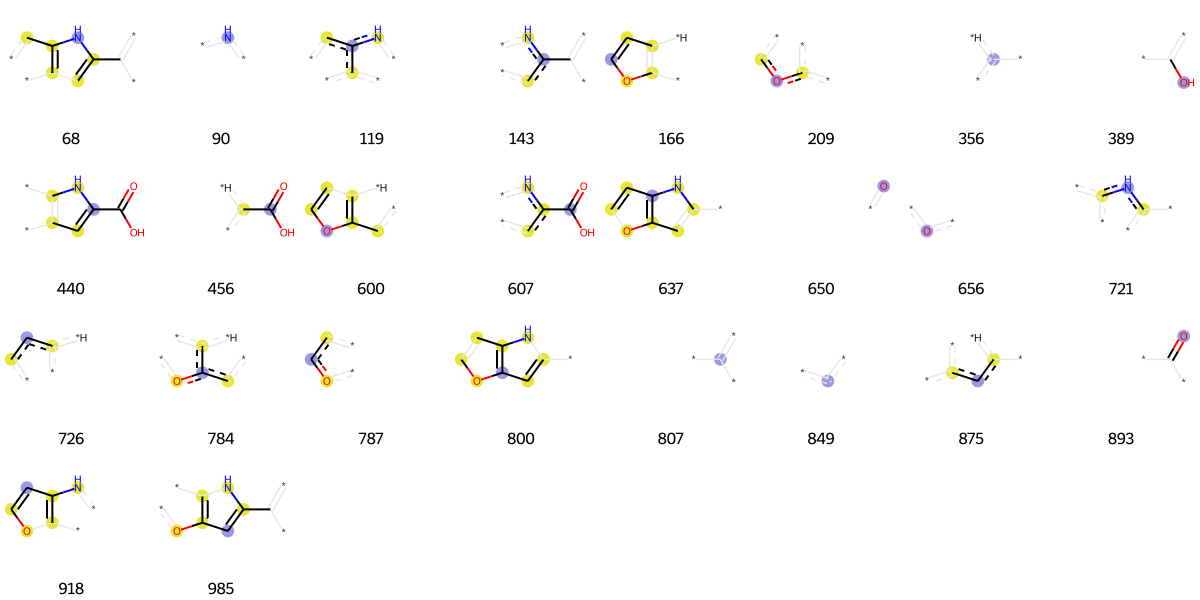

In [4045]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [4046]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[4,
 33,
 34,
 75,
 80,
 94,
 128,
 197,
 201,
 249,
 268,
 294,
 301,
 333,
 343,
 356,
 398,
 409,
 446,
 456,
 466,
 486,
 512,
 514,
 528,
 575,
 580,
 586,
 607,
 650,
 676,
 690,
 695,
 726,
 728,
 790,
 807,
 833,
 841,
 849,
 868,
 893,
 926,
 935,
 946,
 967,
 994,
 998,
 1019]

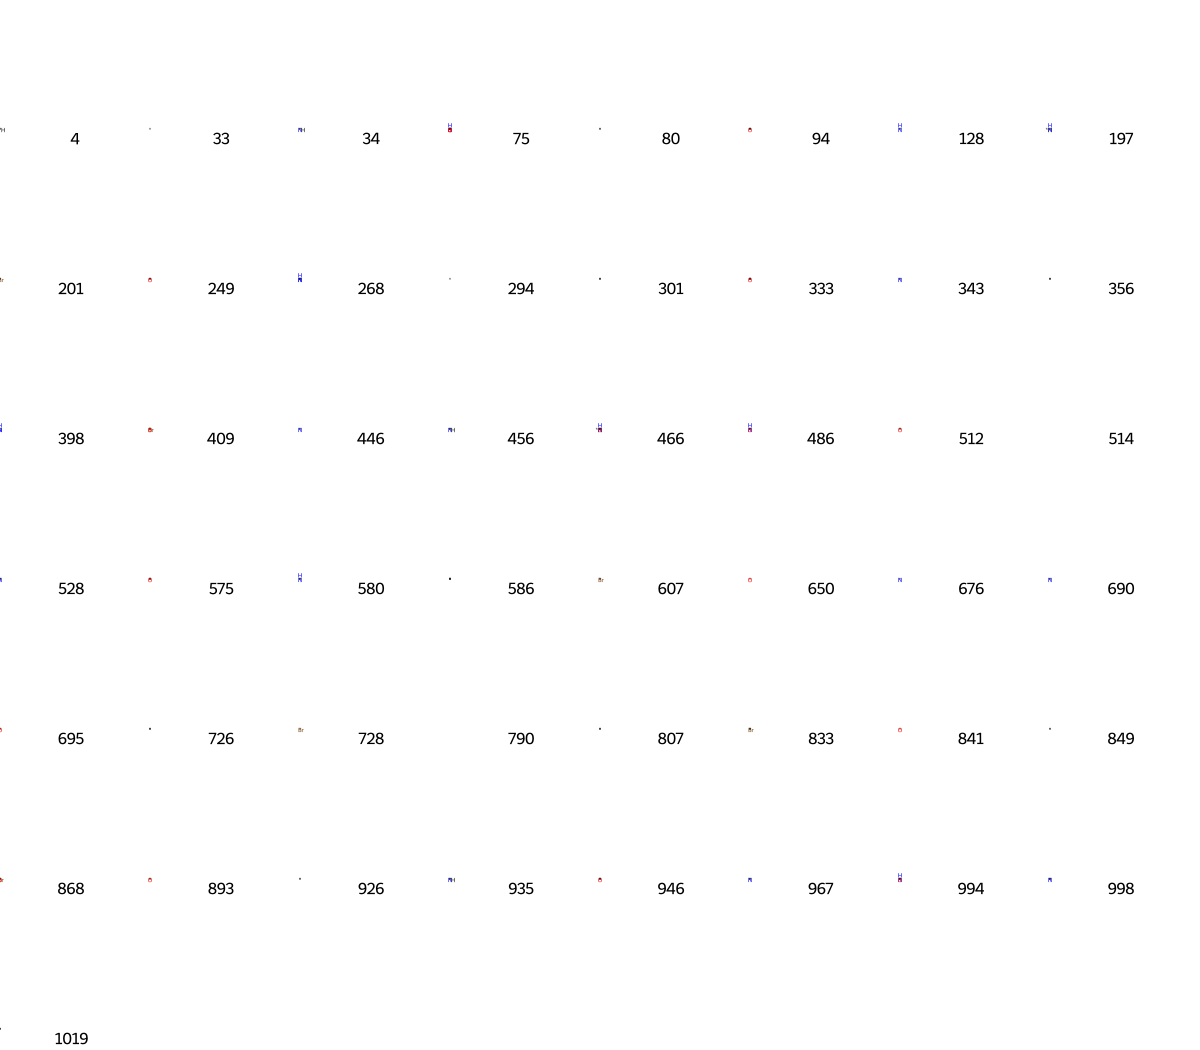

In [4047]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [4048]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[4,
 15,
 33,
 46,
 64,
 65,
 80,
 121,
 255,
 273,
 294,
 301,
 351,
 356,
 381,
 398,
 430,
 446,
 456,
 514,
 578,
 639,
 726,
 739,
 745,
 767,
 794,
 807,
 820,
 849,
 869,
 875,
 919,
 926,
 935,
 976,
 1019]

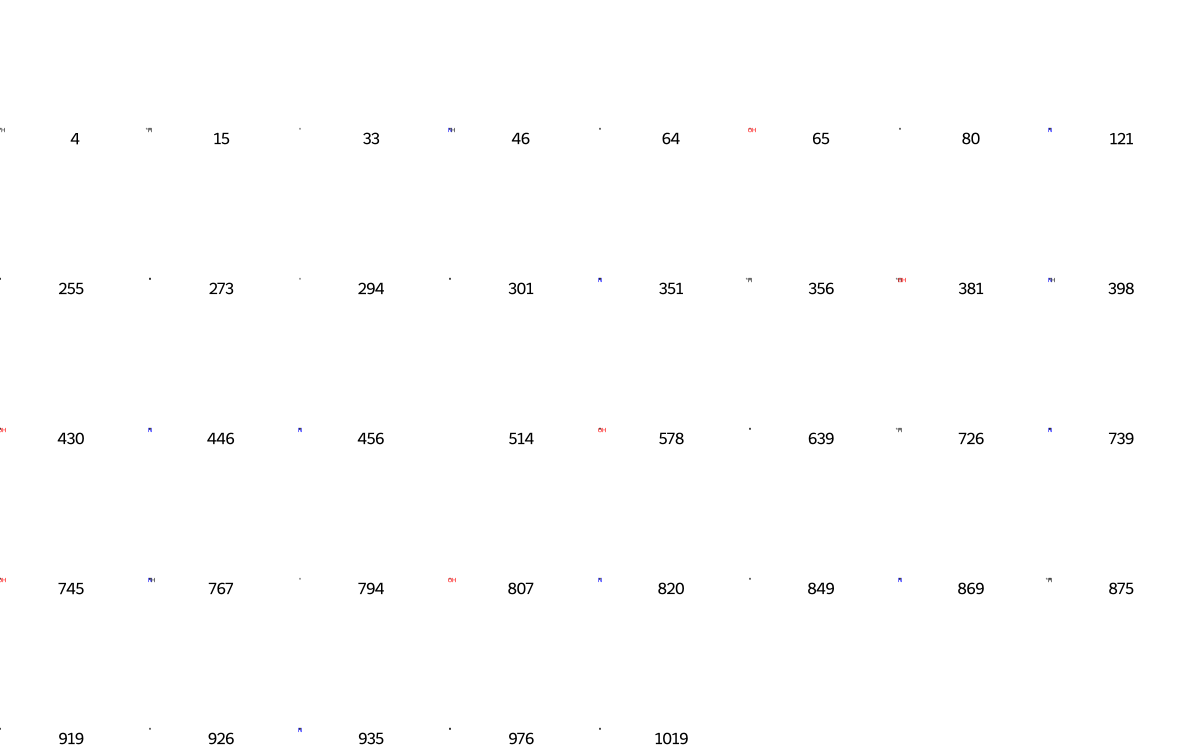

In [4049]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [4050]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 4,
 5,
 10,
 19,
 28,
 33,
 64,
 80,
 90,
 115,
 119,
 160,
 175,
 216,
 231,
 253,
 283,
 288,
 301,
 314,
 321,
 325,
 328,
 333,
 335,
 340,
 349,
 356,
 364,
 389,
 435,
 446,
 456,
 458,
 474,
 482,
 492,
 507,
 519,
 549,
 583,
 634,
 650,
 665,
 684,
 694,
 713,
 722,
 726,
 759,
 806,
 807,
 823,
 849,
 852,
 855,
 893,
 913,
 926,
 935,
 977,
 998,
 1004,
 1019]

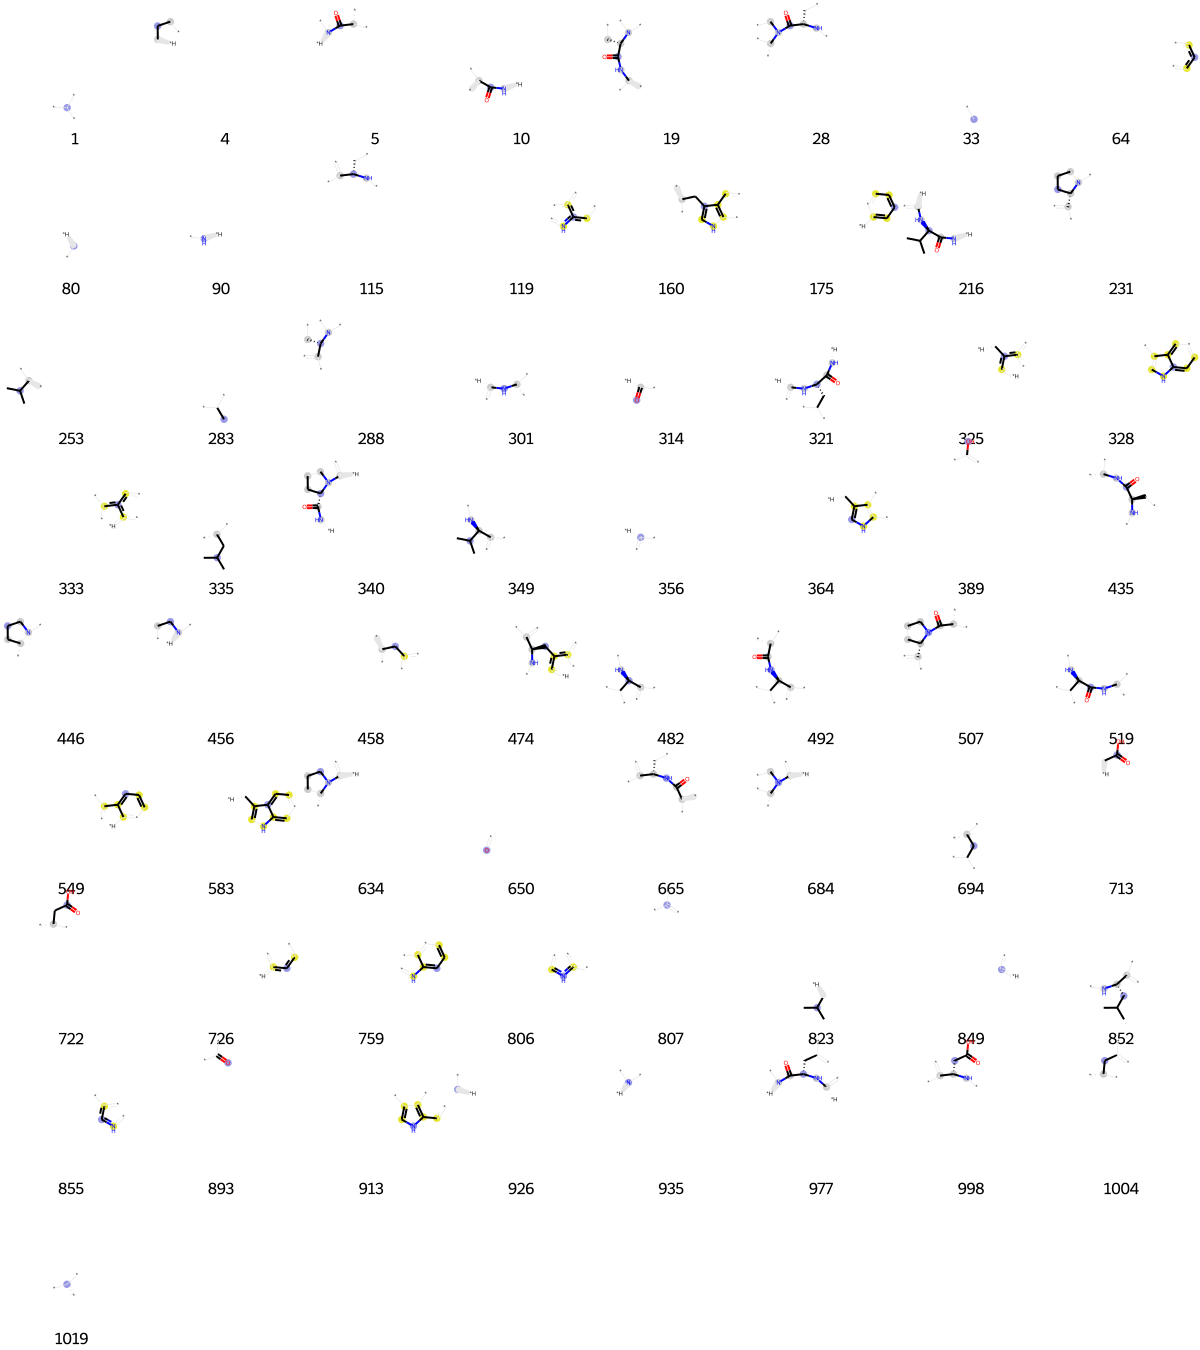

In [4051]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [4052]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[3,
 8,
 13,
 15,
 64,
 95,
 128,
 175,
 210,
 233,
 273,
 293,
 352,
 356,
 366,
 371,
 387,
 486,
 558,
 561,
 586,
 650,
 659,
 699,
 726,
 732,
 786,
 807,
 816,
 849,
 886,
 893,
 904,
 965,
 974,
 984,
 985,
 1001,
 1019]

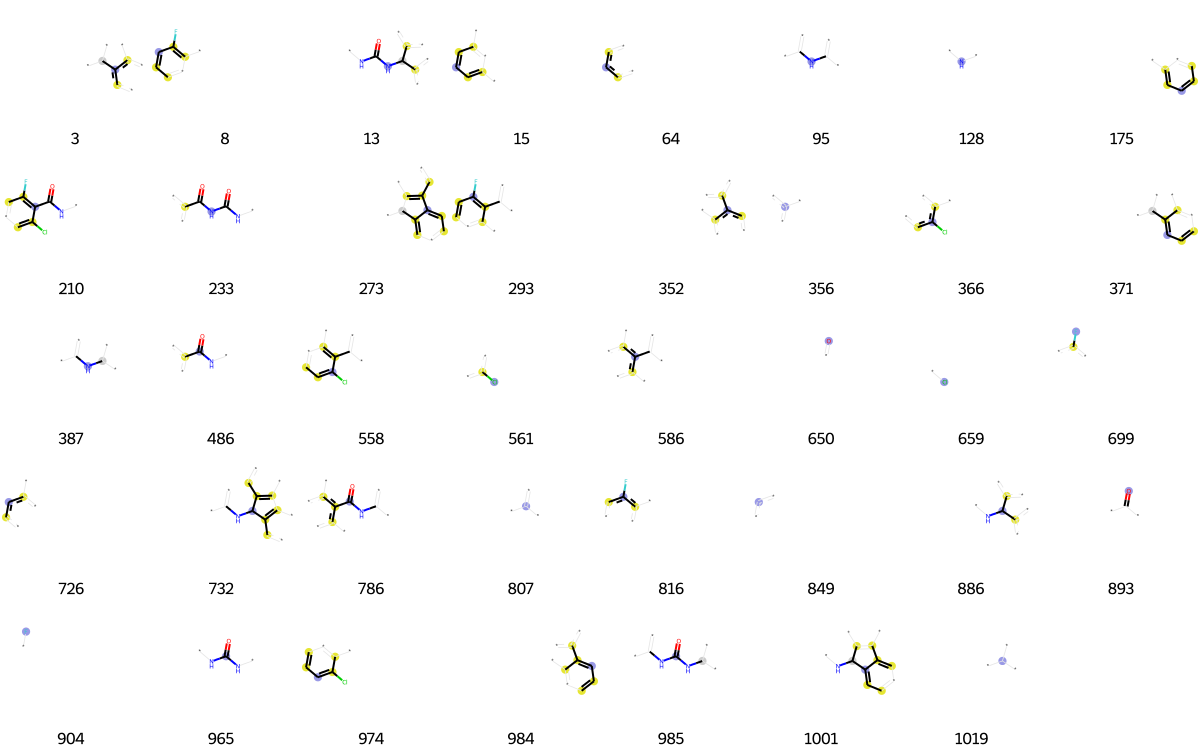

In [4053]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [4054]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[58, 80, 119, 147, 493, 816, 887, 981]

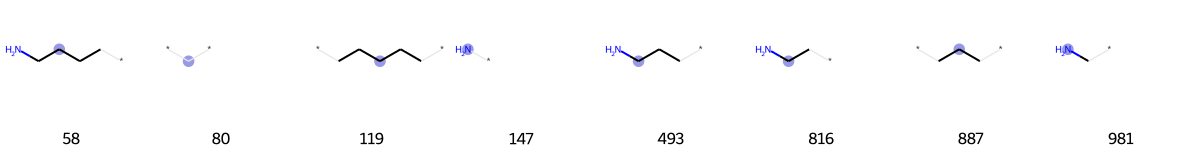

In [4055]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [4056]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[4,
 19,
 33,
 56,
 64,
 121,
 168,
 231,
 255,
 288,
 301,
 356,
 368,
 378,
 437,
 446,
 456,
 486,
 511,
 562,
 579,
 639,
 726,
 749,
 842,
 849,
 926,
 935,
 1019]

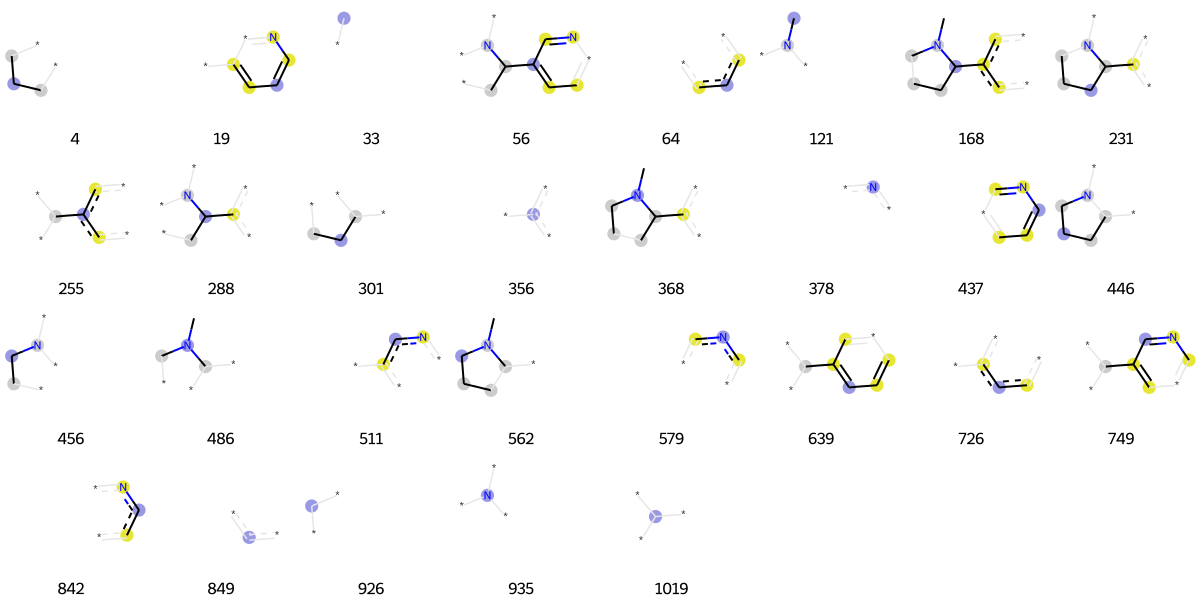

In [4057]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [4058]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[42,
 52,
 64,
 68,
 80,
 90,
 107,
 119,
 143,
 175,
 309,
 322,
 356,
 389,
 428,
 440,
 456,
 477,
 607,
 650,
 654,
 695,
 718,
 721,
 726,
 730,
 745,
 793,
 807,
 831,
 835,
 849,
 875,
 893,
 915,
 1018]

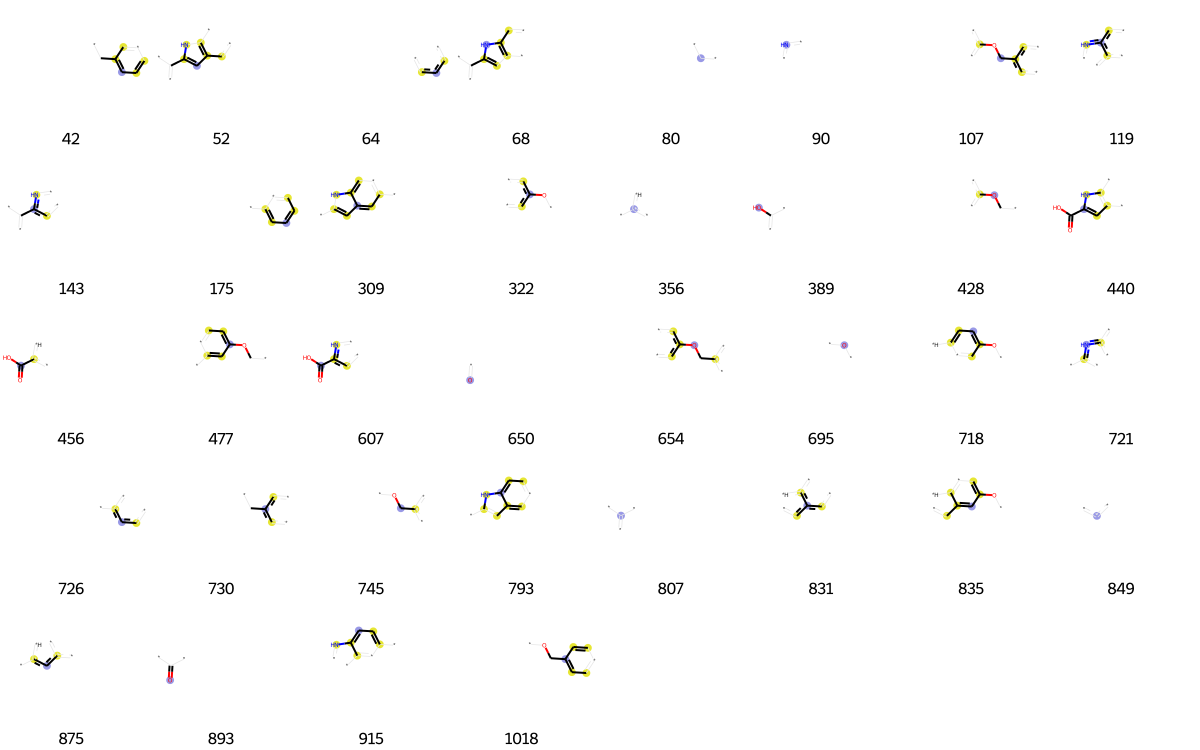

In [4059]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [4060]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[21,
 33,
 80,
 106,
 114,
 119,
 136,
 160,
 219,
 294,
 310,
 356,
 361,
 389,
 420,
 456,
 591,
 650,
 673,
 726,
 730,
 794,
 807,
 849,
 887,
 893,
 896,
 940,
 978]

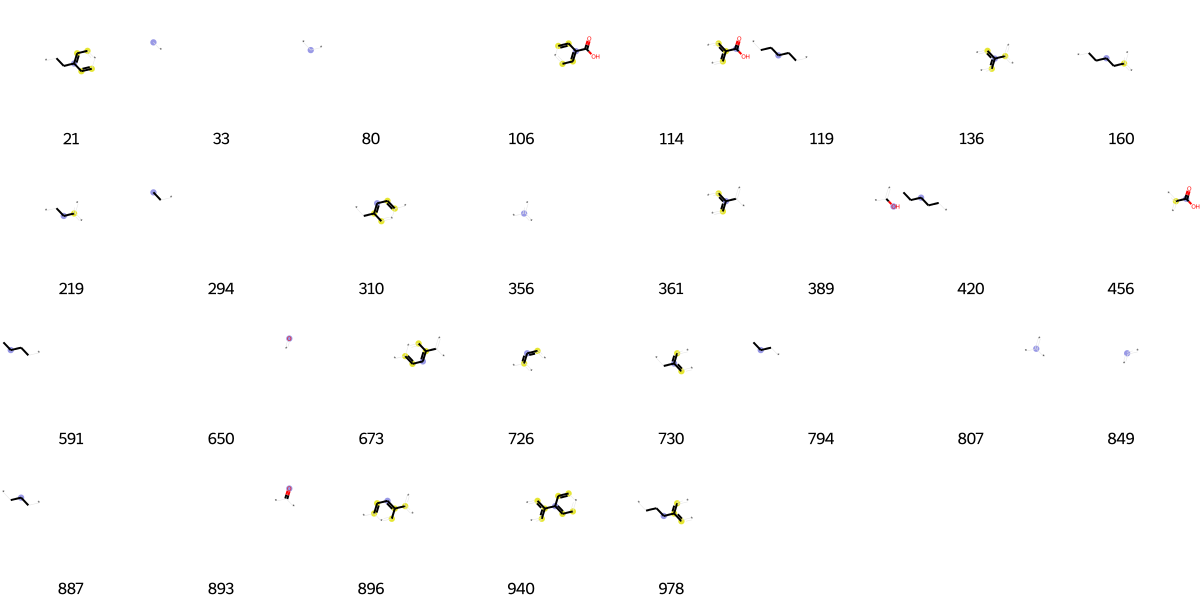

In [4061]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [4062]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 24,
 33,
 80,
 97,
 179,
 192,
 193,
 214,
 283,
 294,
 323,
 356,
 378,
 492,
 496,
 546,
 597,
 598,
 601,
 679,
 692,
 695,
 698,
 705,
 707,
 760,
 831,
 849,
 862,
 875,
 890,
 920,
 997]

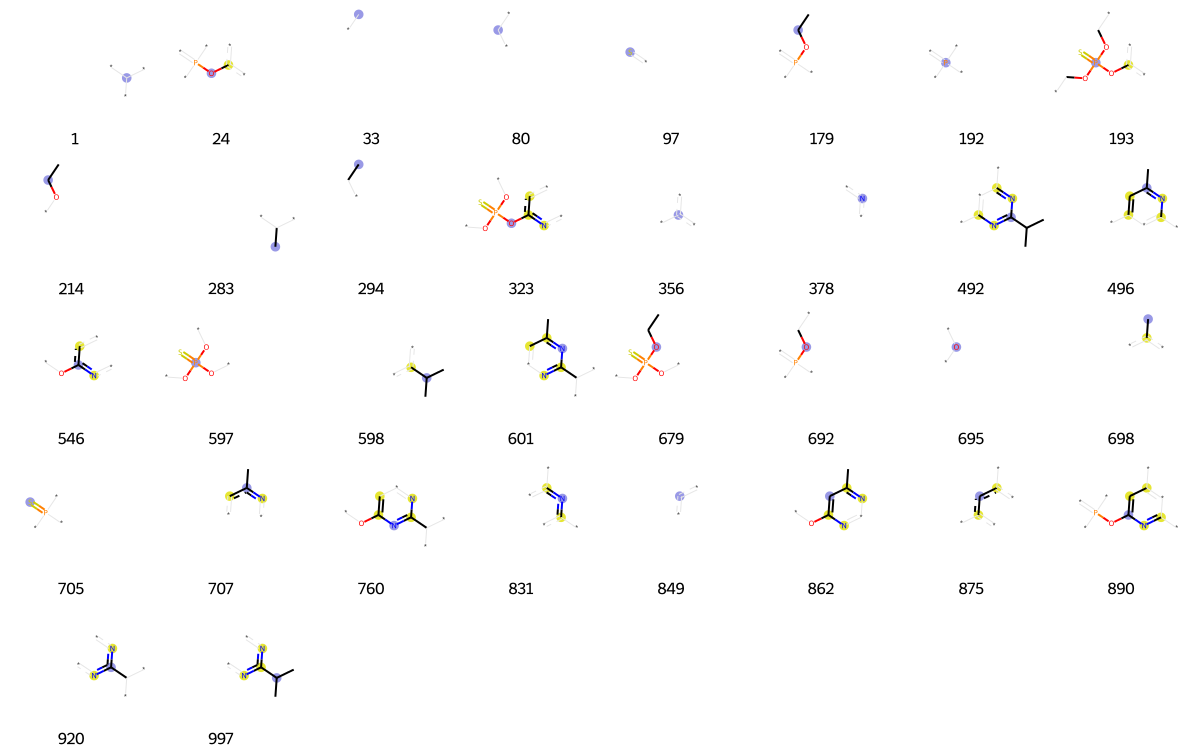

In [4063]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [4064]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[26,
 33,
 36,
 71,
 80,
 105,
 120,
 138,
 144,
 151,
 206,
 222,
 233,
 250,
 268,
 279,
 301,
 324,
 453,
 494,
 500,
 511,
 519,
 522,
 528,
 529,
 562,
 590,
 622,
 640,
 650,
 775,
 807,
 893,
 926,
 927,
 956,
 1005,
 1019]

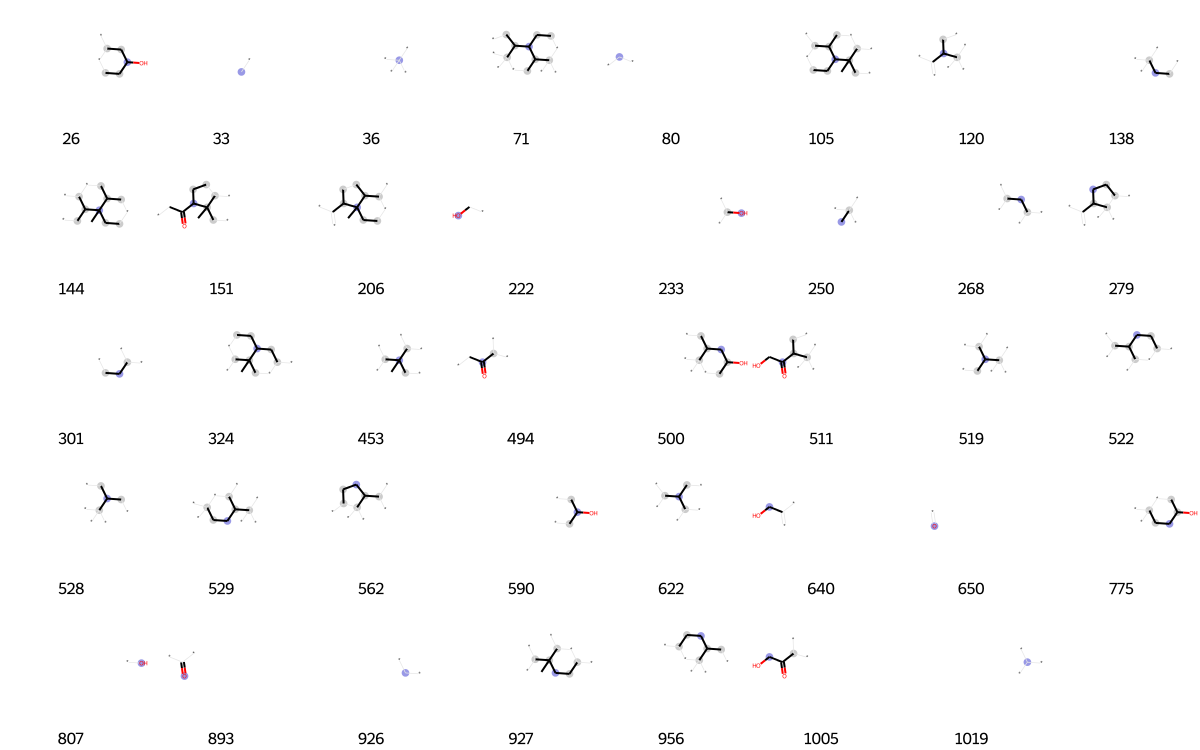

In [4065]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [4066]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33,
 64,
 80,
 128,
 145,
 147,
 175,
 180,
 214,
 294,
 307,
 347,
 350,
 356,
 378,
 380,
 392,
 423,
 452,
 502,
 512,
 546,
 558,
 561,
 582,
 587,
 608,
 640,
 649,
 650,
 659,
 695,
 698,
 702,
 726,
 734,
 759,
 792,
 807,
 831,
 840,
 841,
 849,
 852,
 875,
 893,
 965,
 967,
 992,
 997]

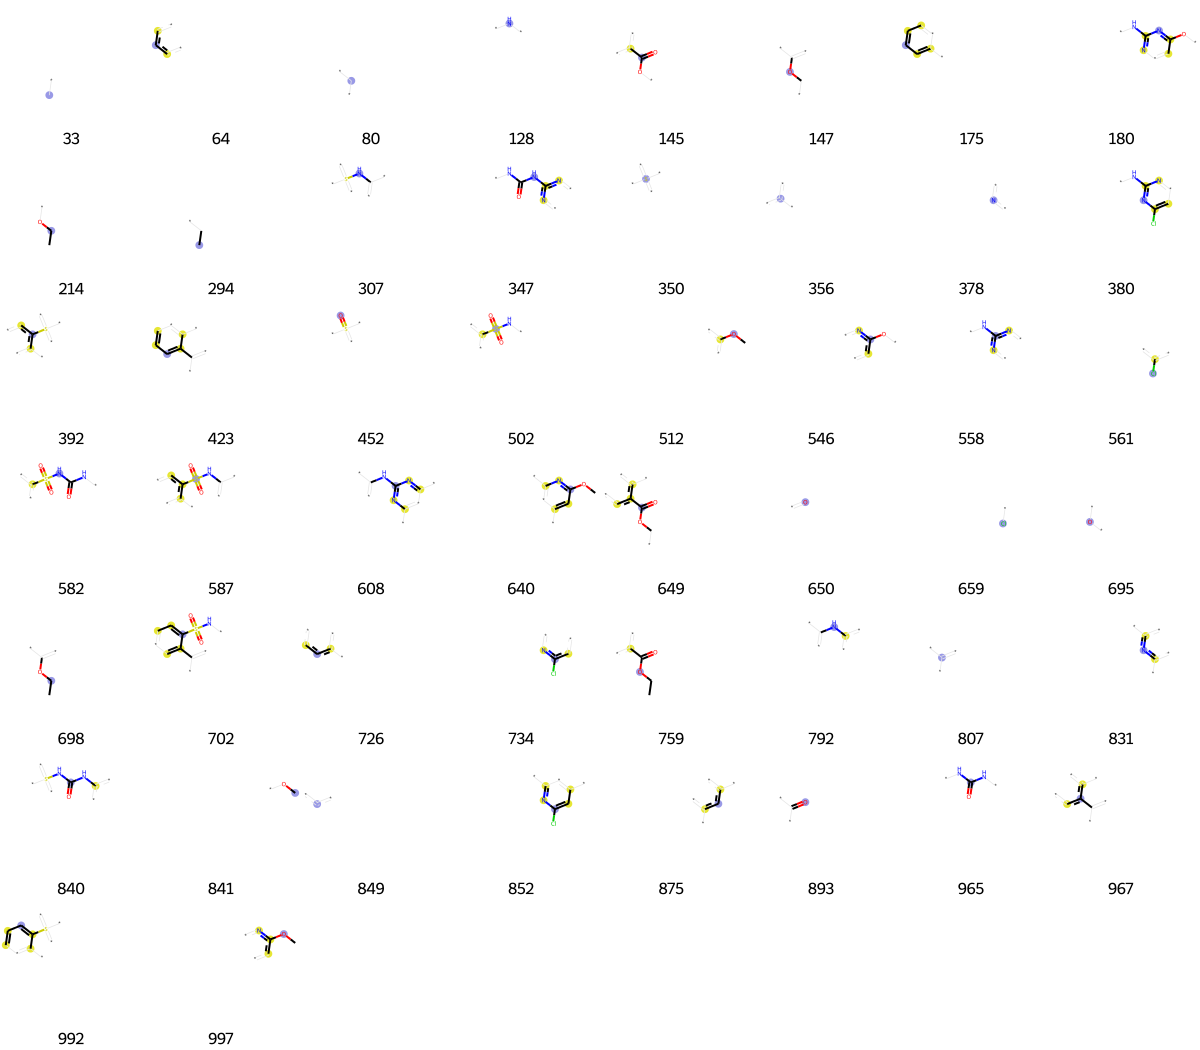

In [4067]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [4068]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[33,
 36,
 46,
 50,
 66,
 90,
 97,
 117,
 124,
 138,
 157,
 202,
 225,
 231,
 233,
 250,
 268,
 276,
 285,
 289,
 301,
 314,
 328,
 352,
 356,
 377,
 398,
 439,
 455,
 470,
 475,
 483,
 504,
 558,
 590,
 598,
 622,
 650,
 656,
 661,
 668,
 694,
 696,
 698,
 731,
 757,
 775,
 790,
 795,
 807,
 849,
 850,
 860,
 901,
 917,
 926,
 937,
 960,
 979,
 1014,
 1019,
 1020]

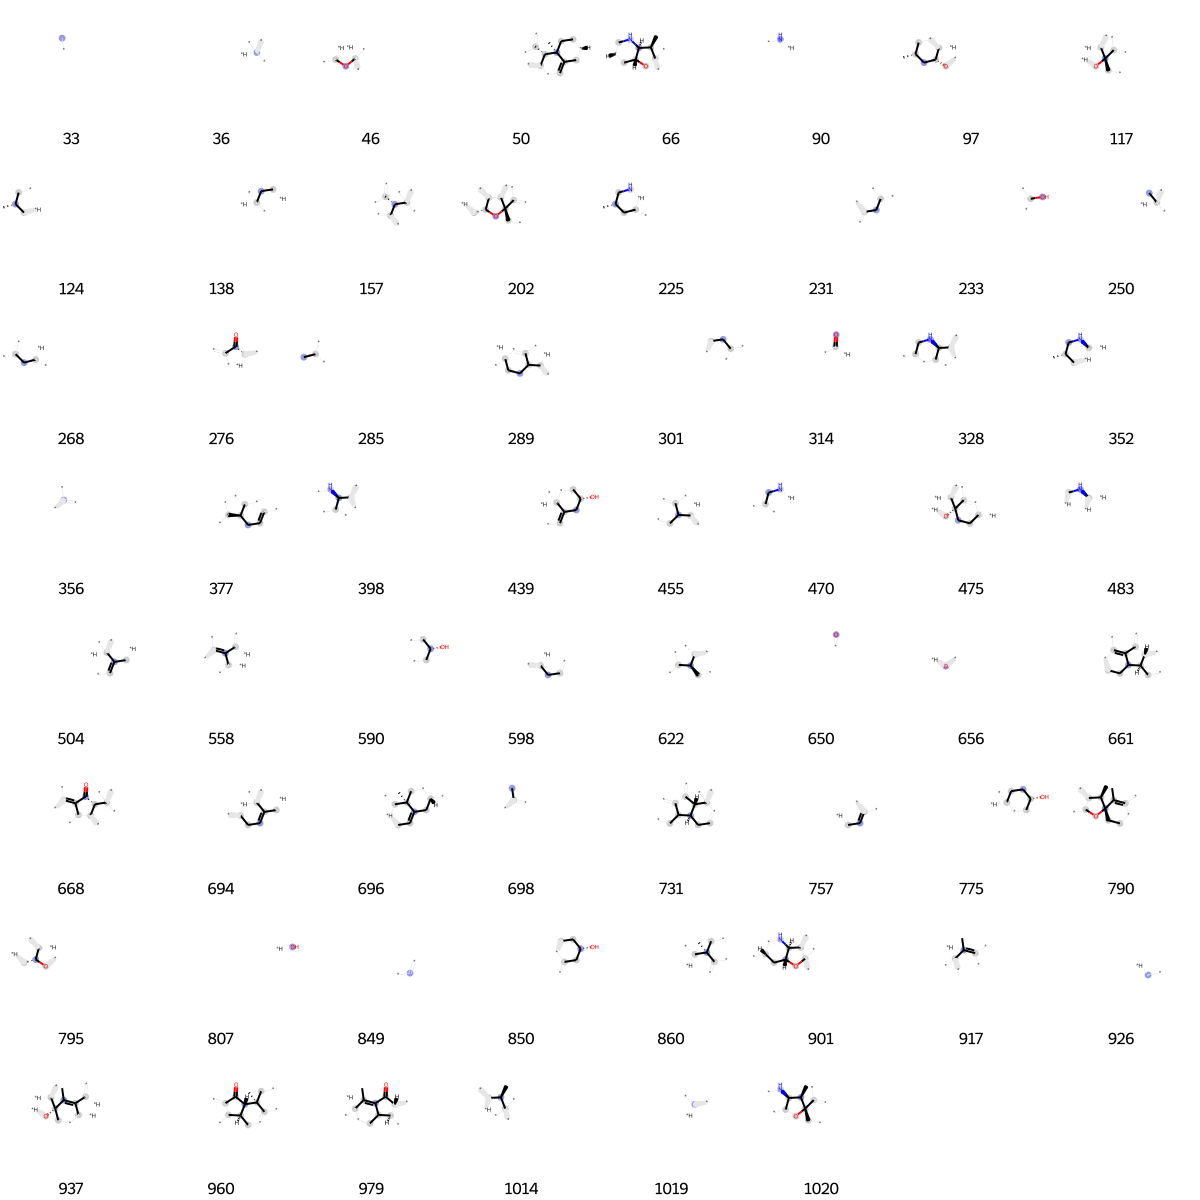

In [4069]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [4070]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 63,
 64,
 72,
 73,
 94,
 115,
 128,
 168,
 175,
 191,
 192,
 246,
 249,
 289,
 322,
 350,
 356,
 378,
 386,
 392,
 428,
 452,
 502,
 503,
 511,
 512,
 558,
 650,
 689,
 695,
 718,
 726,
 743,
 781,
 831,
 841,
 849,
 875,
 929,
 946,
 948,
 1000]

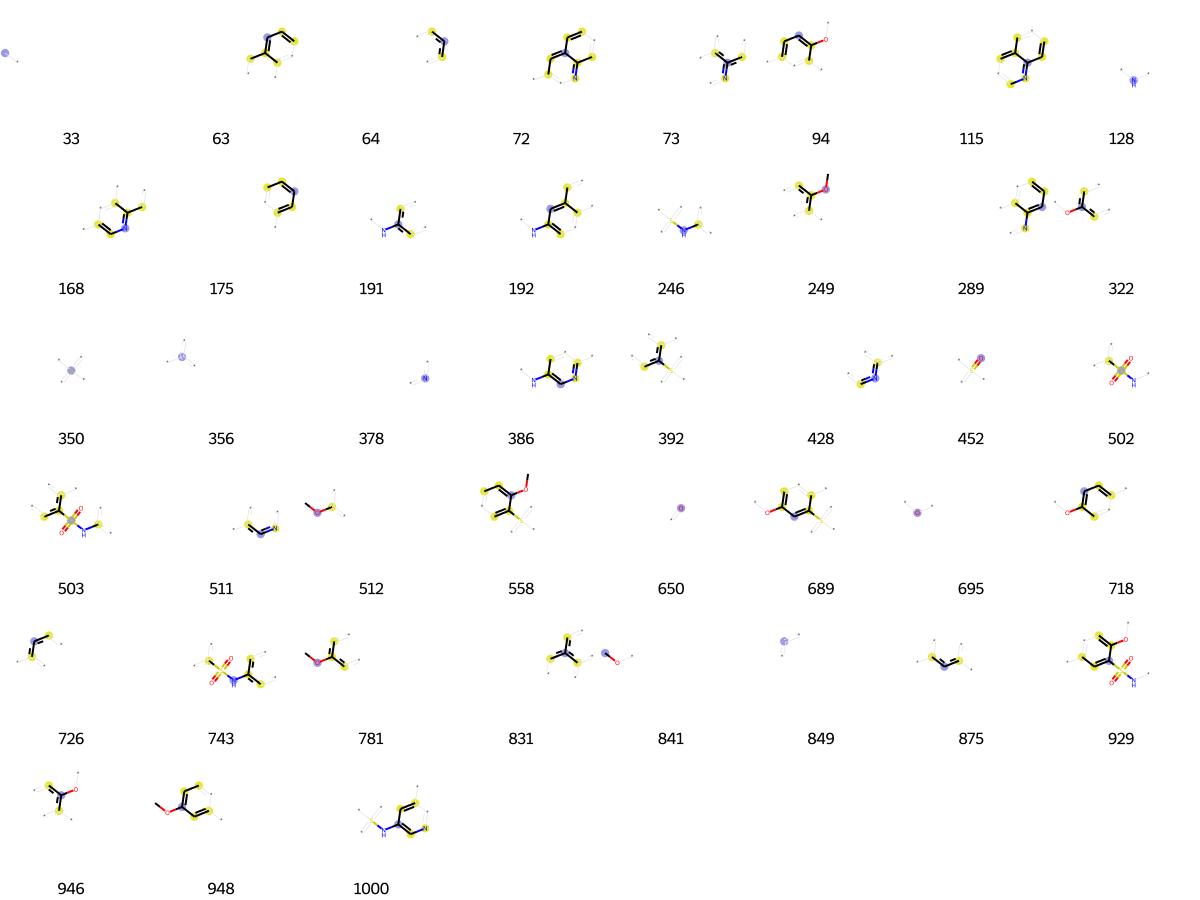

In [4071]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [4072]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[33,
 45,
 90,
 164,
 231,
 244,
 271,
 284,
 285,
 305,
 308,
 314,
 333,
 356,
 363,
 382,
 389,
 407,
 419,
 456,
 492,
 501,
 525,
 536,
 567,
 586,
 620,
 650,
 675,
 684,
 699,
 713,
 771,
 804,
 807,
 816,
 849,
 875,
 880,
 893,
 904,
 926,
 935,
 955,
 974,
 996,
 1007,
 1019]

In [4073]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 33,
 41,
 80,
 128,
 147,
 197,
 283,
 294,
 389,
 403,
 540,
 565,
 600,
 650,
 681,
 702,
 739,
 767,
 786,
 807,
 820,
 825,
 893,
 900]

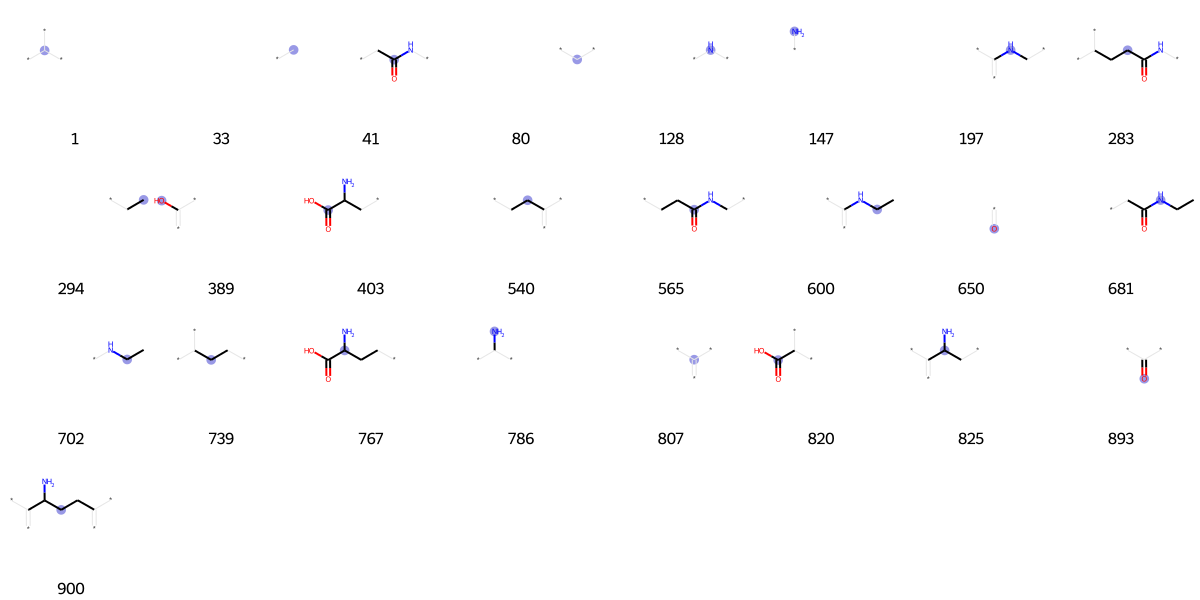

In [4074]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [4075]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 80,
 216,
 222,
 227,
 377,
 387,
 389,
 411,
 482,
 650,
 657,
 807,
 820,
 829,
 831,
 876,
 888,
 893]

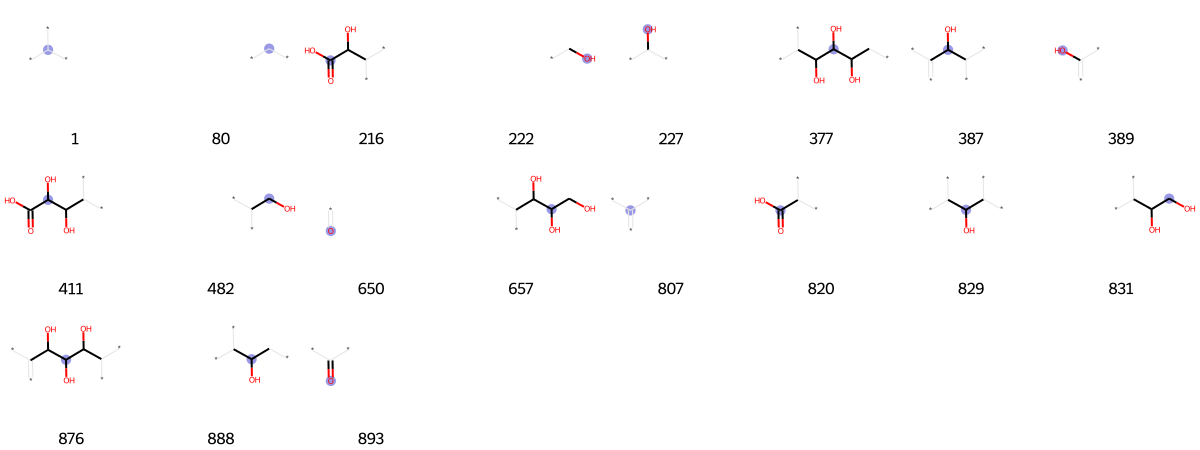

In [4076]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [4077]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[33,
 34,
 36,
 67,
 68,
 71,
 104,
 105,
 138,
 144,
 225,
 231,
 235,
 250,
 301,
 314,
 356,
 430,
 453,
 476,
 516,
 519,
 522,
 528,
 529,
 576,
 598,
 622,
 627,
 650,
 714,
 787,
 788,
 849,
 919,
 926,
 948,
 956,
 1019]

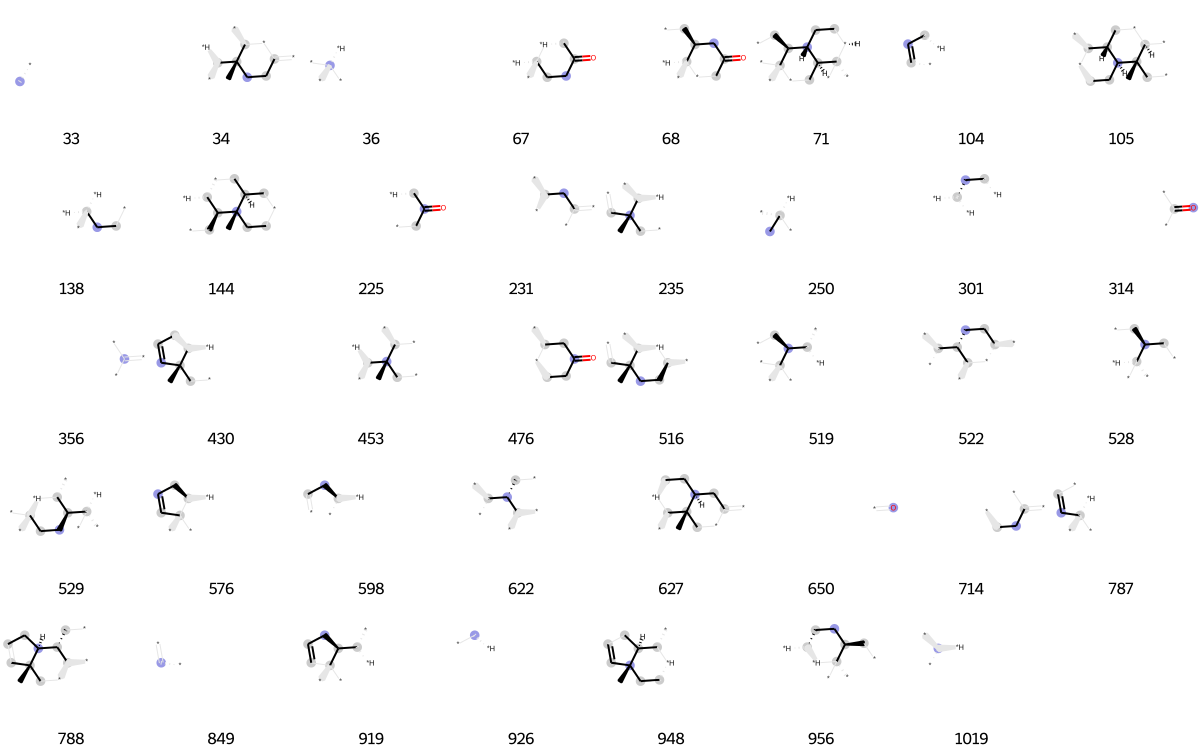

In [4078]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [4079]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 4,
 33,
 80,
 112,
 128,
 147,
 166,
 227,
 250,
 283,
 338,
 341,
 356,
 360,
 361,
 410,
 433,
 550,
 601,
 606,
 632,
 674,
 726,
 782,
 790,
 807,
 829,
 838,
 849,
 875,
 910,
 949,
 1006,
 1017]

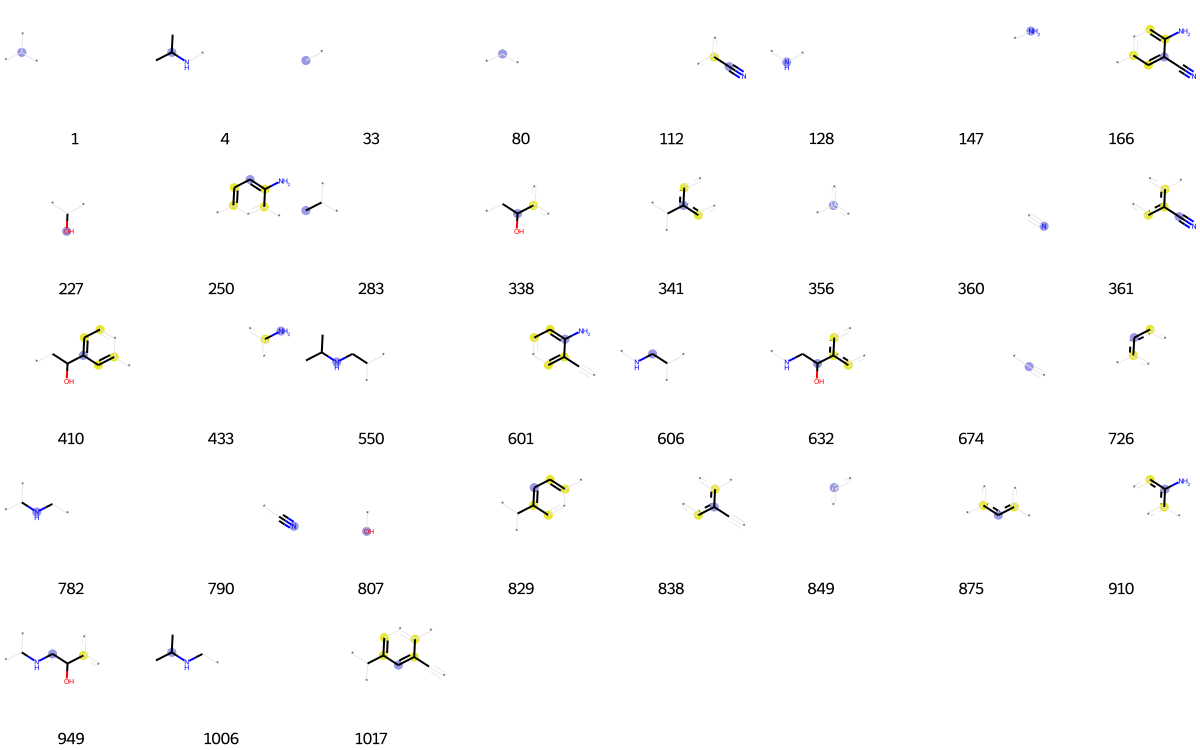

In [4080]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [4081]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 33,
 80,
 89,
 114,
 128,
 146,
 147,
 227,
 262,
 269,
 275,
 322,
 338,
 341,
 356,
 366,
 392,
 419,
 429,
 433,
 447,
 554,
 561,
 603,
 606,
 610,
 632,
 659,
 807,
 809,
 843,
 849,
 875,
 904,
 942,
 951]

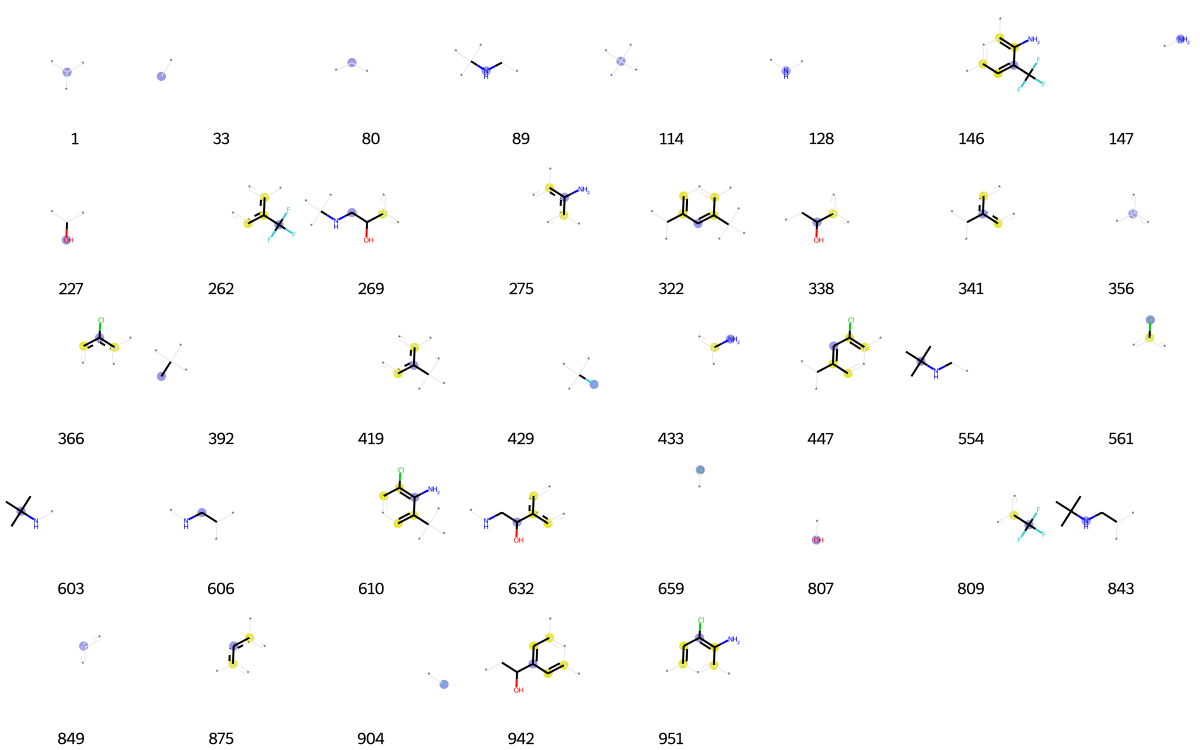

In [4082]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [4083]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 15,
 64,
 65,
 74,
 80,
 90,
 175,
 241,
 297,
 329,
 332,
 340,
 341,
 356,
 386,
 389,
 406,
 456,
 461,
 479,
 514,
 603,
 646,
 694,
 699,
 726,
 767,
 829,
 835,
 849,
 876,
 878,
 904,
 926,
 935,
 1000,
 1009]

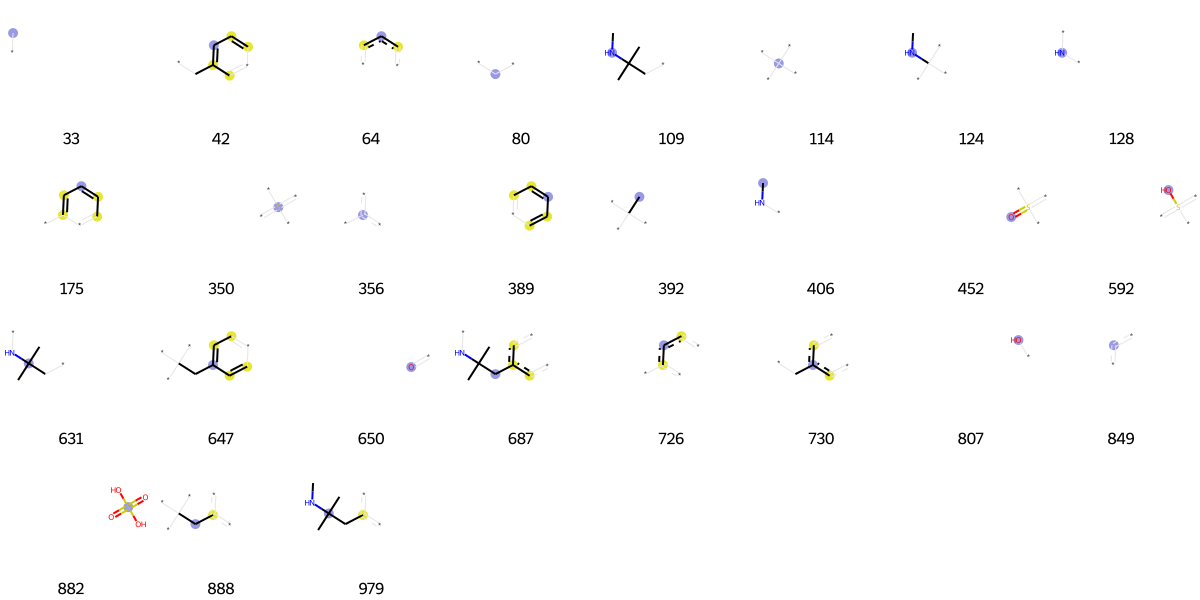

In [4084]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [4085]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[4,
 33,
 59,
 73,
 80,
 82,
 147,
 212,
 221,
 232,
 237,
 249,
 294,
 333,
 335,
 356,
 369,
 378,
 407,
 433,
 435,
 456,
 469,
 484,
 512,
 514,
 540,
 565,
 624,
 644,
 650,
 680,
 695,
 760,
 780,
 794,
 807,
 831,
 841,
 843,
 849,
 875,
 891,
 893,
 926,
 935,
 946,
 985,
 996,
 1009]

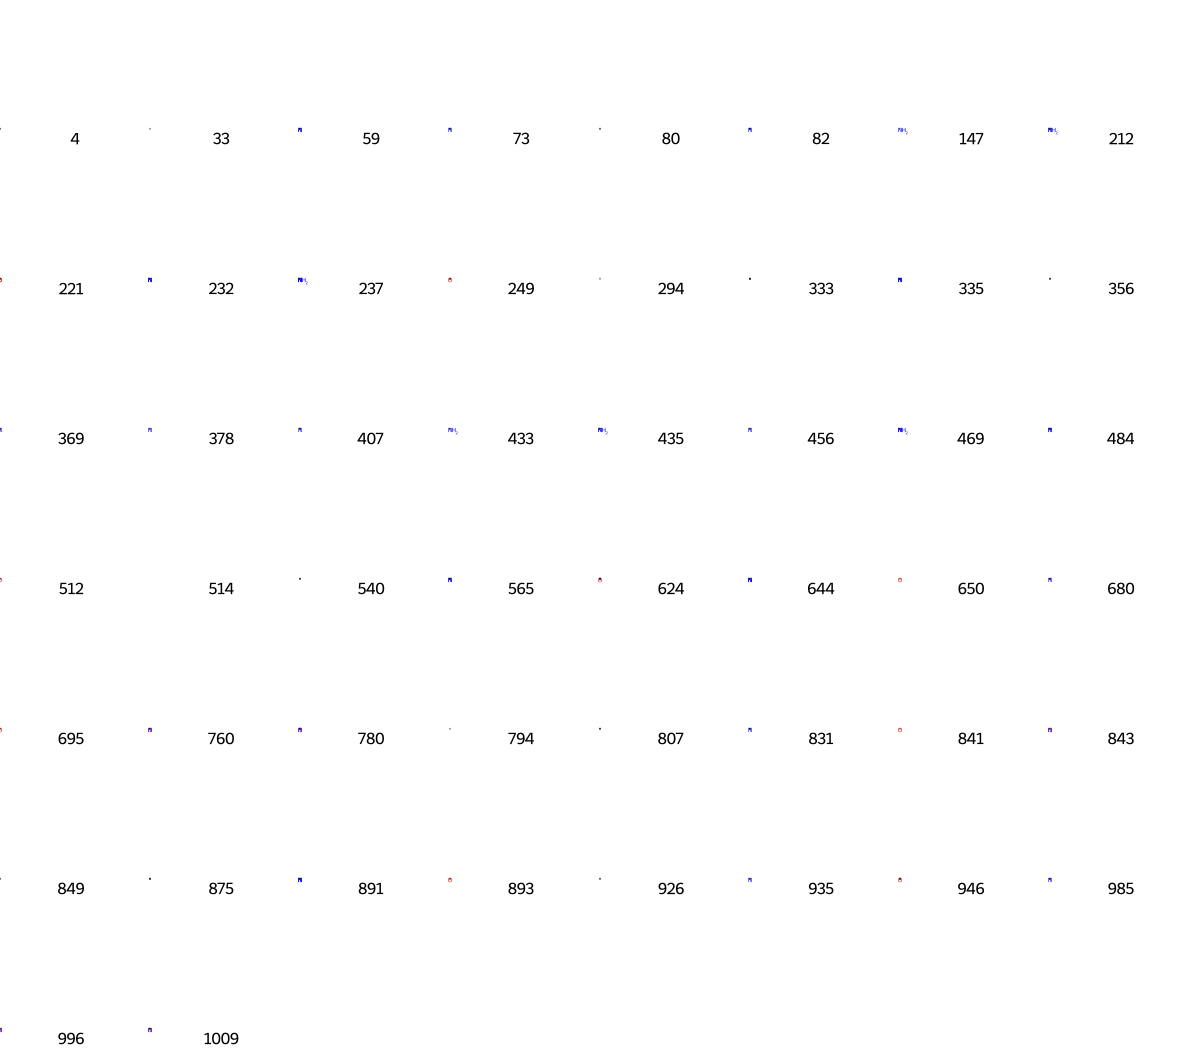

In [4086]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [4087]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[68,
 171,
 199,
 202,
 250,
 354,
 356,
 364,
 536,
 578,
 583,
 650,
 715,
 716,
 753,
 785,
 807,
 816,
 838,
 839,
 849,
 875,
 939]

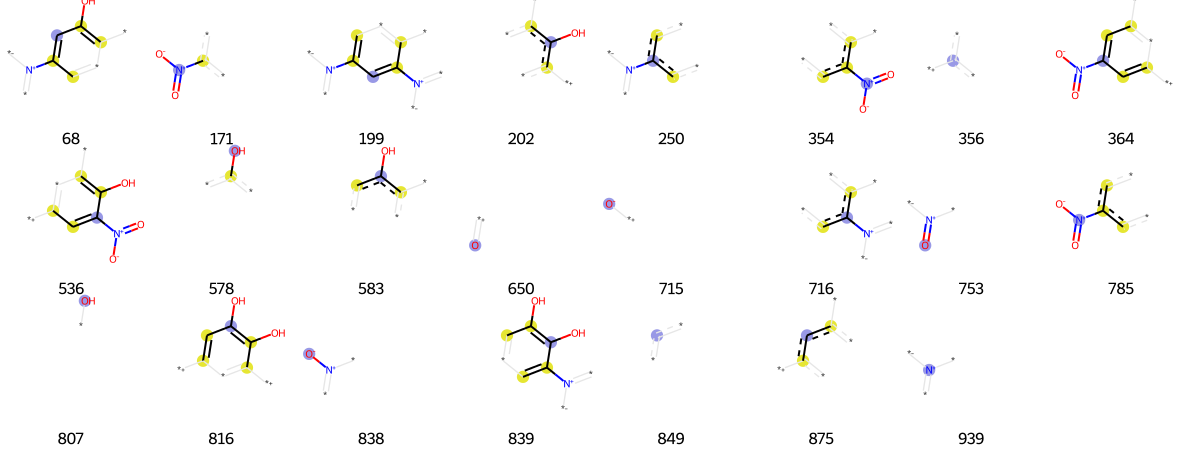

In [4088]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [4089]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[33,
 45,
 83,
 96,
 98,
 106,
 114,
 121,
 124,
 143,
 171,
 191,
 198,
 230,
 233,
 235,
 249,
 262,
 270,
 281,
 314,
 317,
 352,
 354,
 356,
 361,
 367,
 378,
 389,
 456,
 580,
 641,
 642,
 650,
 656,
 673,
 694,
 698,
 715,
 716,
 726,
 753,
 770,
 789,
 801,
 807,
 838,
 849,
 875,
 879,
 893,
 895,
 913,
 929,
 935,
 939]

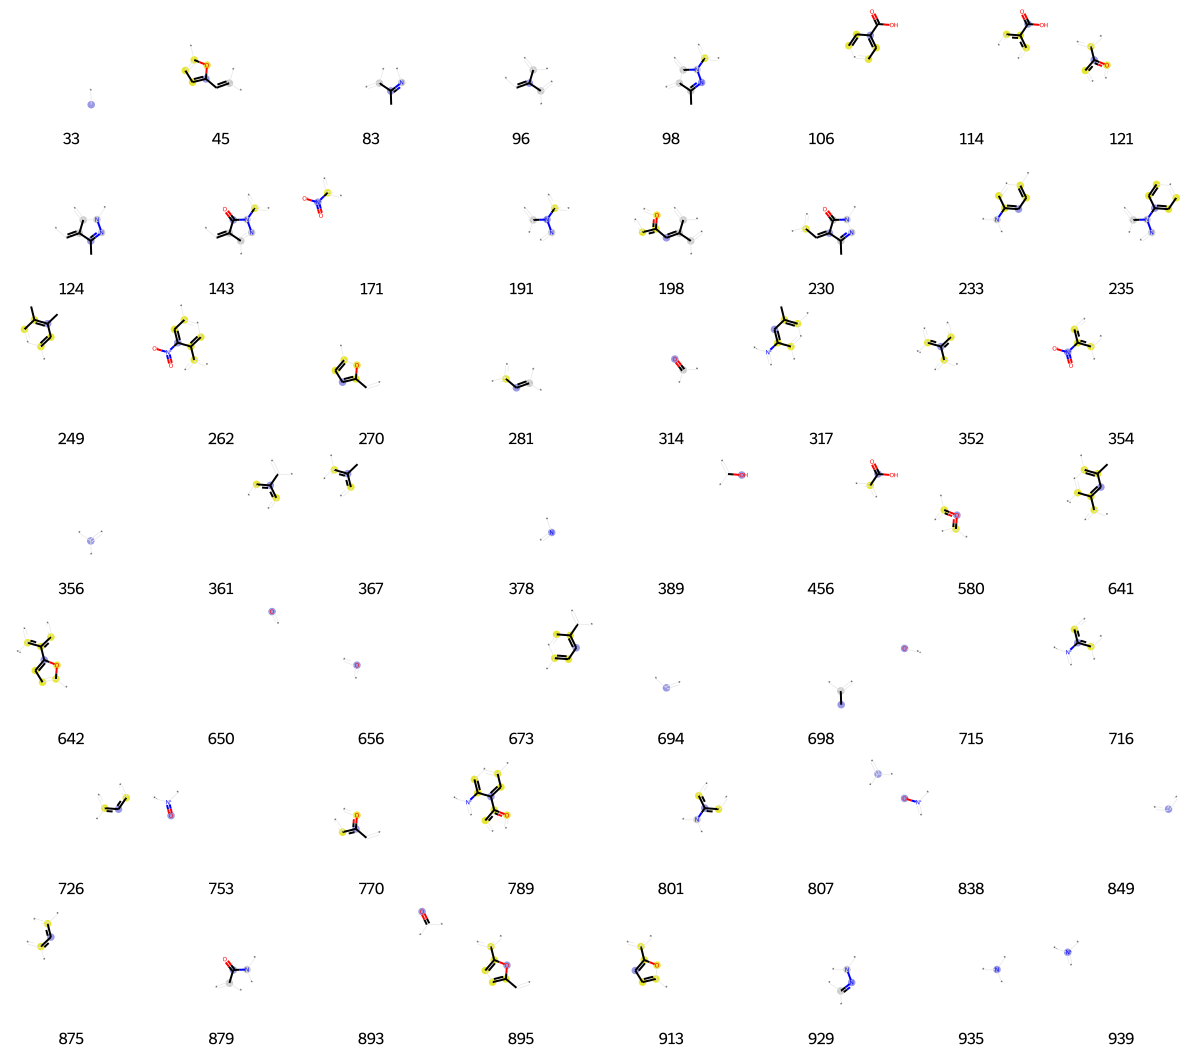

In [4090]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [4091]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[11,
 32,
 33,
 36,
 84,
 88,
 129,
 138,
 155,
 242,
 250,
 255,
 289,
 301,
 314,
 356,
 387,
 412,
 424,
 460,
 479,
 519,
 529,
 555,
 565,
 574,
 581,
 650,
 666,
 679,
 695,
 697,
 698,
 714,
 718,
 744,
 793,
 807,
 841,
 849,
 860,
 893,
 918,
 926,
 947,
 987,
 1017,
 1019]

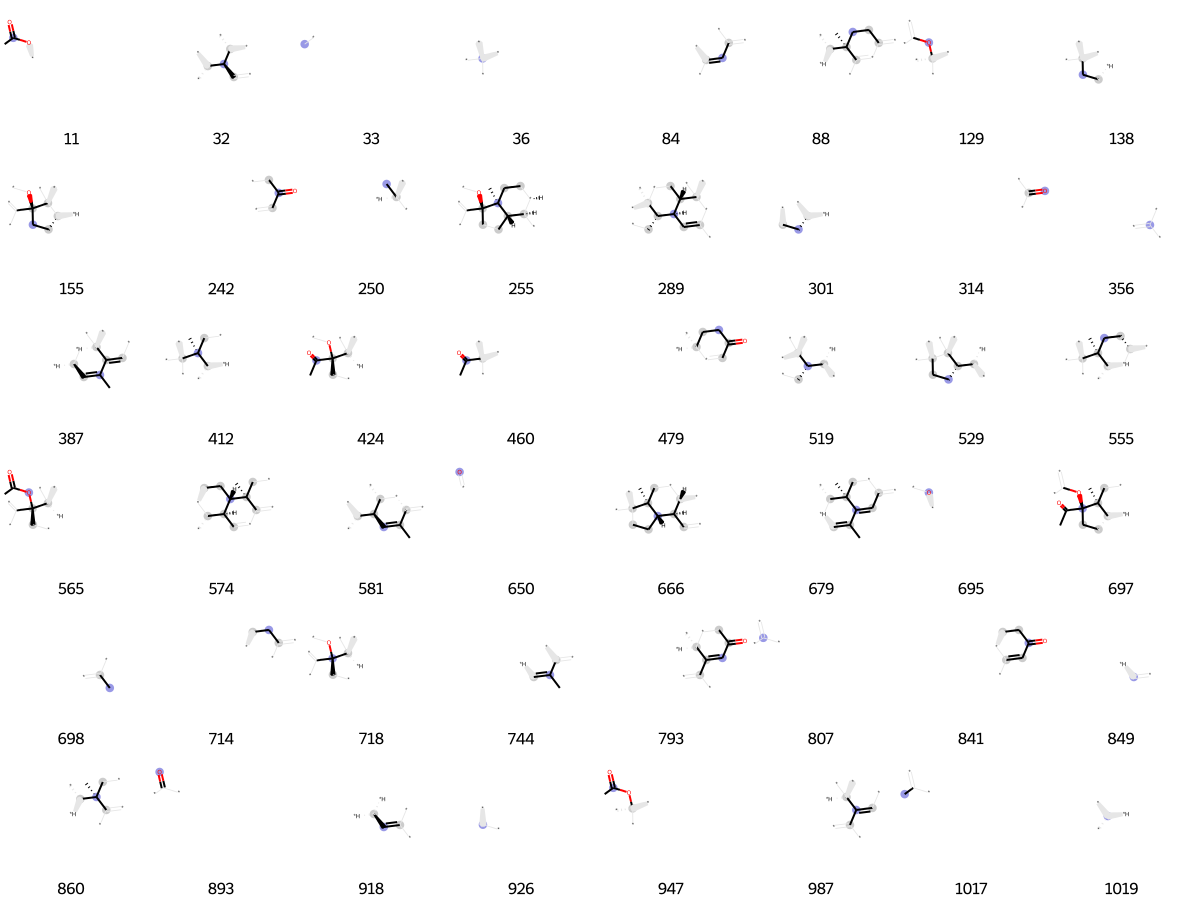

In [4092]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [4093]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[8,
 15,
 64,
 80,
 140,
 147,
 197,
 198,
 309,
 354,
 356,
 378,
 394,
 464,
 650,
 699,
 726,
 737,
 741,
 747,
 759,
 781,
 807,
 816,
 849,
 855,
 861,
 893,
 904,
 935,
 970,
 986,
 1010]

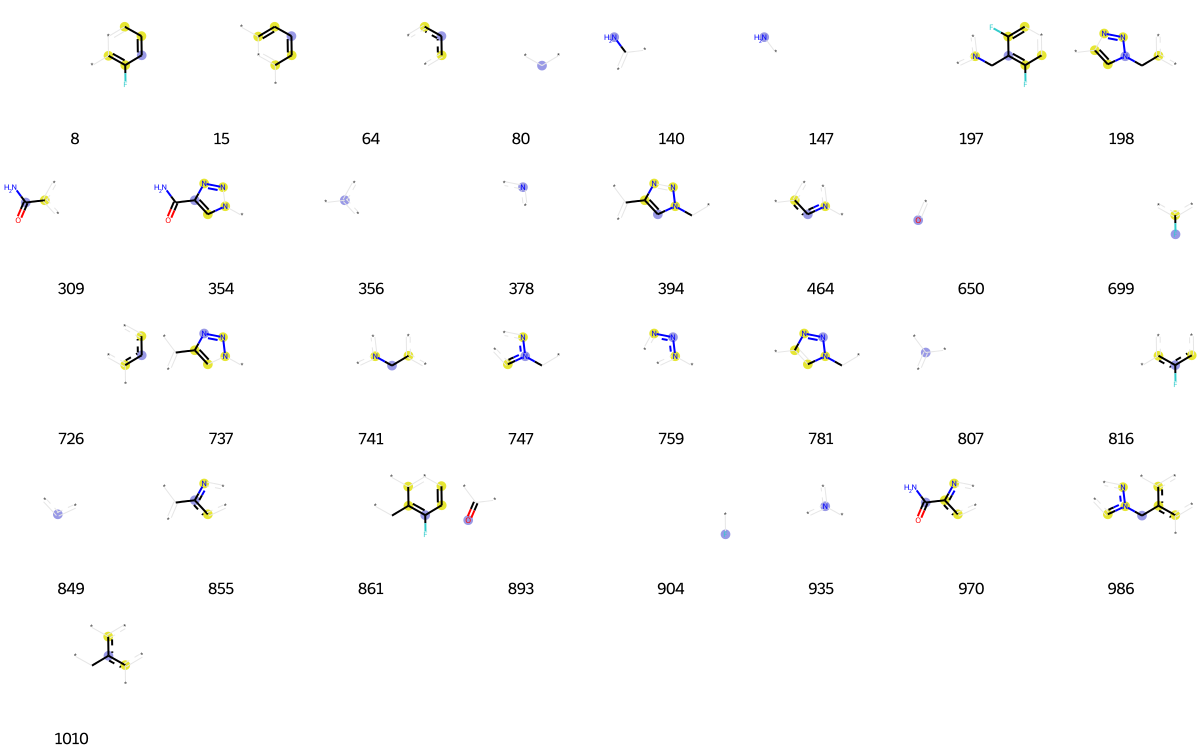

In [4094]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [4095]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[64,
 90,
 114,
 118,
 140,
 147,
 175,
 356,
 386,
 389,
 393,
 521,
 641,
 646,
 650,
 692,
 699,
 726,
 807,
 849,
 864,
 893,
 904,
 921,
 993]

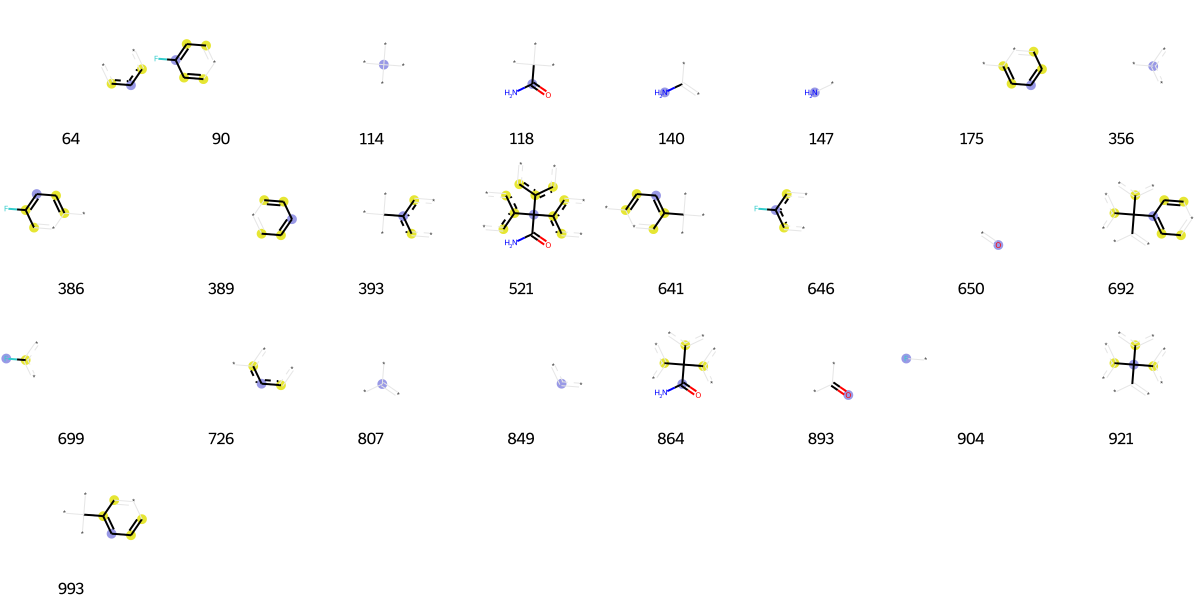

In [4096]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [4097]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[17,
 33,
 36,
 46,
 51,
 78,
 80,
 84,
 96,
 162,
 182,
 199,
 222,
 233,
 240,
 250,
 261,
 268,
 301,
 314,
 356,
 373,
 404,
 408,
 412,
 465,
 504,
 519,
 547,
 588,
 622,
 640,
 650,
 656,
 676,
 679,
 703,
 706,
 714,
 786,
 787,
 807,
 849,
 893,
 905,
 910,
 914,
 926,
 960,
 967,
 973,
 991,
 997,
 1009,
 1019]

In [4098]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[80,
 90,
 119,
 144,
 147,
 219,
 289,
 325,
 328,
 332,
 333,
 356,
 364,
 381,
 387,
 476,
 514,
 578,
 726,
 728,
 745,
 806,
 807,
 816,
 849,
 855,
 875,
 913,
 915,
 981]

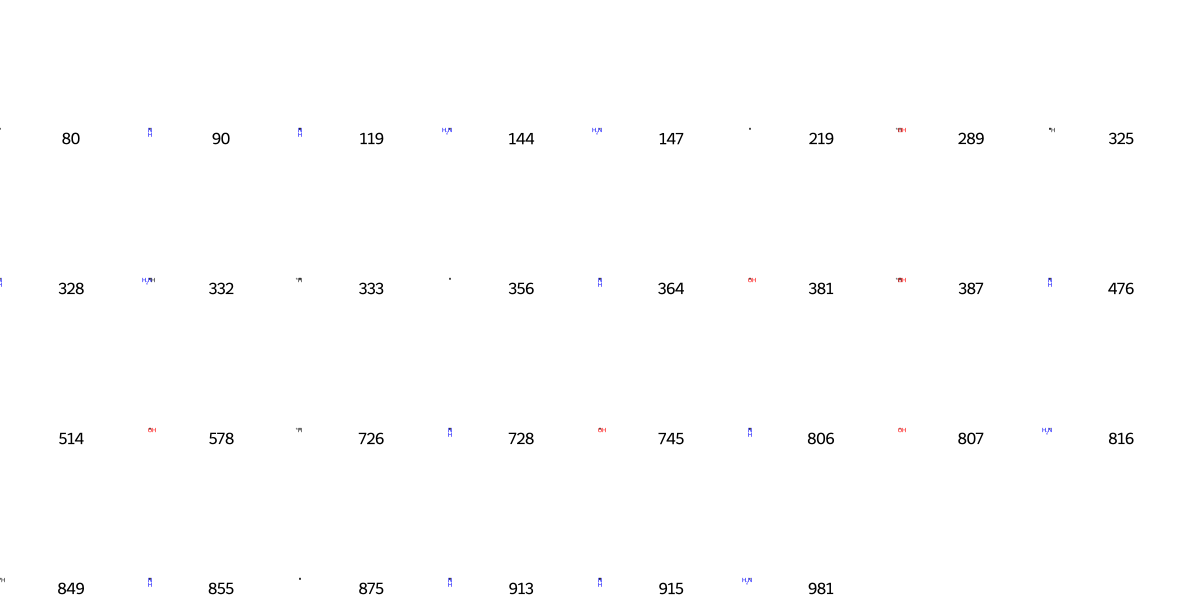

In [4099]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [4100]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[10,
 13,
 29,
 33,
 80,
 102,
 114,
 140,
 145,
 147,
 151,
 203,
 214,
 294,
 301,
 322,
 335,
 356,
 361,
 378,
 407,
 428,
 456,
 498,
 527,
 606,
 635,
 650,
 673,
 695,
 698,
 707,
 718,
 726,
 746,
 755,
 759,
 800,
 807,
 832,
 849,
 893,
 926,
 935,
 962,
 998,
 1018,
 1019]

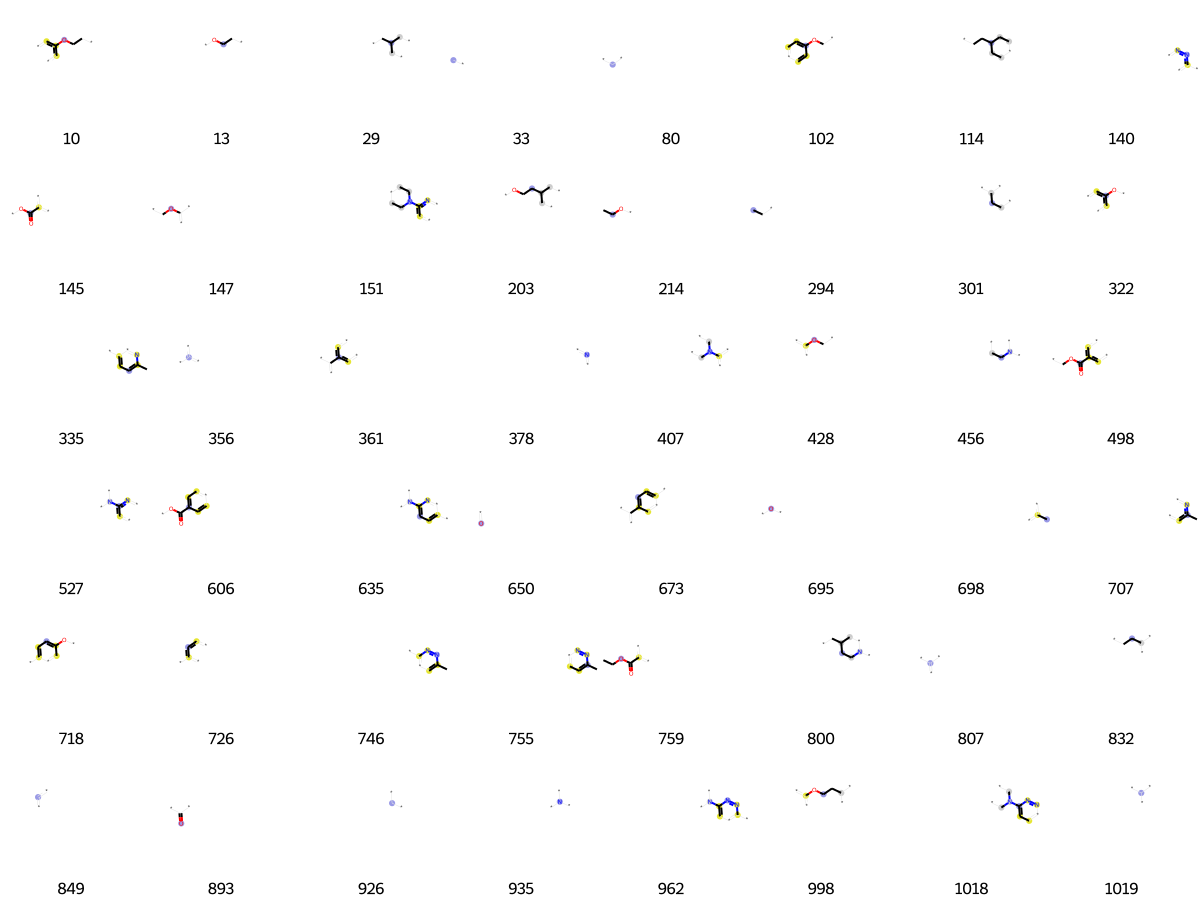

In [4101]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [4102]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 64,
 75,
 80,
 121,
 128,
 140,
 147,
 175,
 253,
 296,
 341,
 356,
 389,
 416,
 514,
 557,
 616,
 650,
 655,
 667,
 726,
 739,
 807,
 849,
 874,
 890,
 893,
 1004]

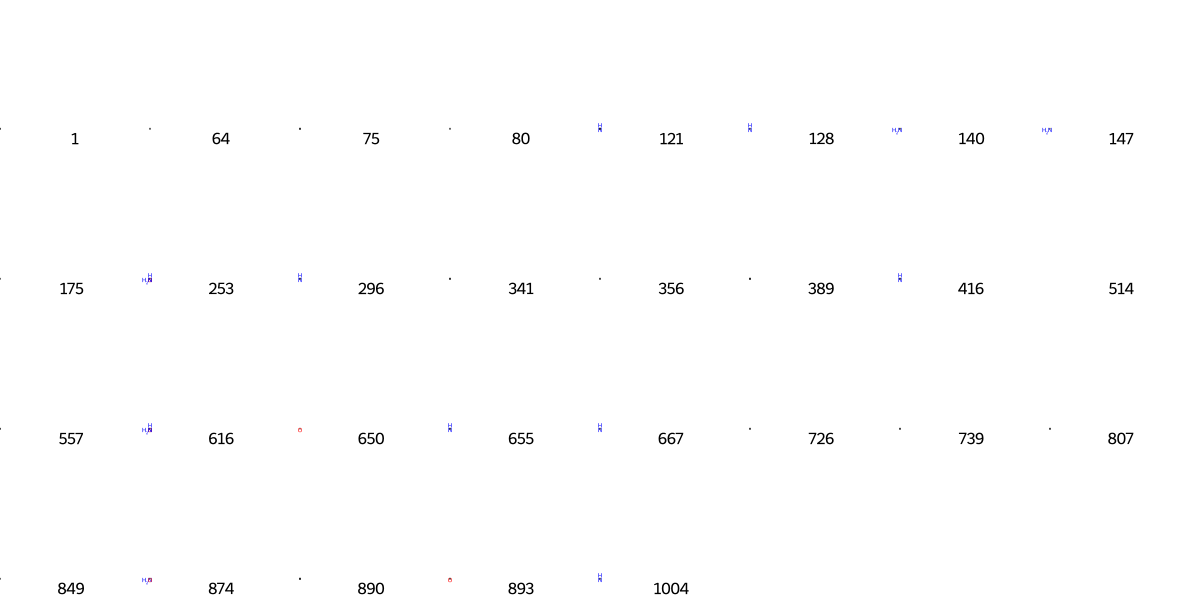

In [4103]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [4104]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[25,
 33,
 42,
 64,
 74,
 80,
 92,
 175,
 328,
 350,
 356,
 376,
 378,
 389,
 416,
 456,
 590,
 622,
 659,
 694,
 698,
 706,
 707,
 725,
 726,
 730,
 740,
 741,
 742,
 747,
 767,
 784,
 801,
 828,
 849,
 864,
 926,
 927,
 932,
 935,
 948,
 949]

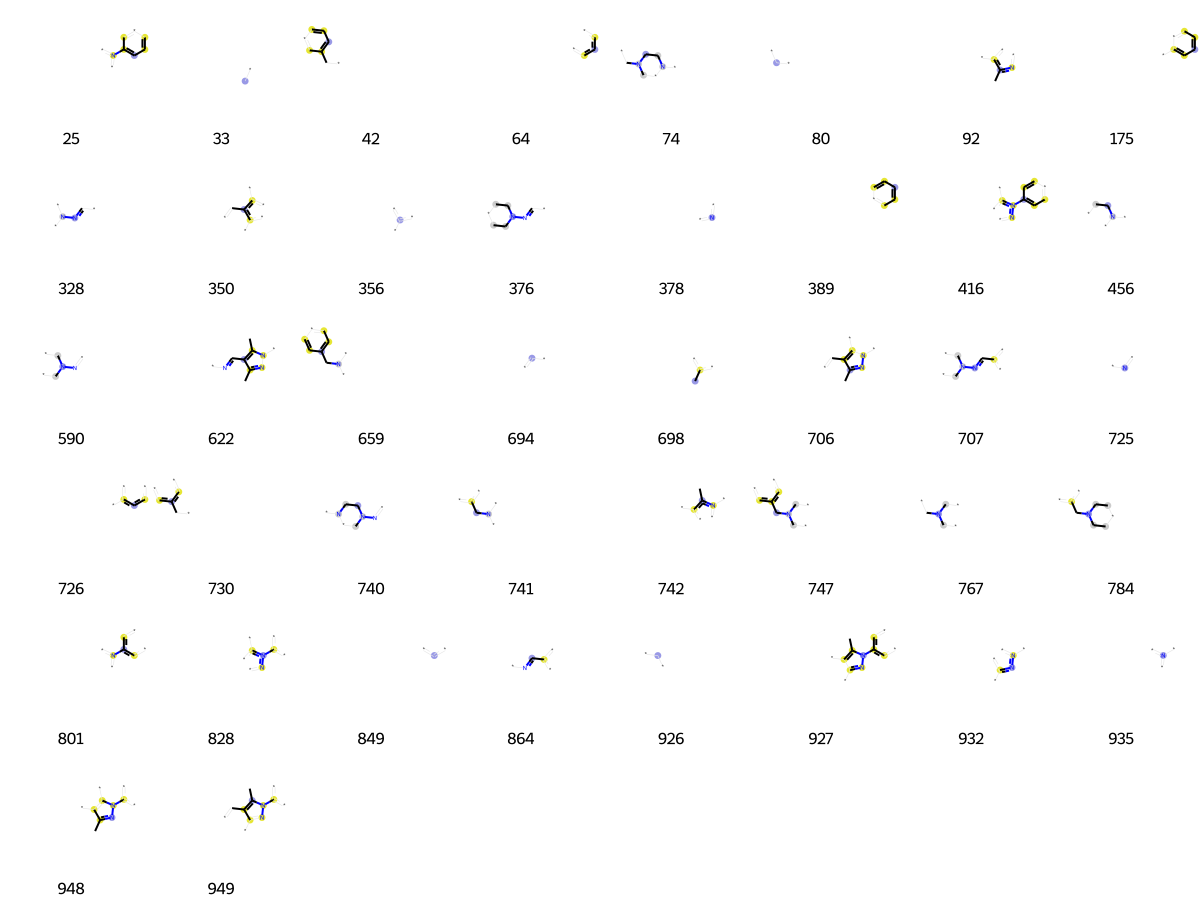

In [4105]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])